# FAQ

<패스트캠퍼스 결제내역 EDA PJT>
1. 쿠폰 발행 기준이 어떻게 되는지
==> 특별한 기준은 없습니다. 크게 아래와 같이 구분 가능합니다.

  (1) 전사적으로 매달 프로모션 부서에서 발급하는 쿠폰

  (2) 회원가입 시 증정하는 쿠폰

  (3) 강의별로 진행하는 독립적인 쿠폰 등


2. 이윤기준 (정확한 원가 정보가 아니더라도 얼마 정도가 되야 이윤이 발생하는지)
    a. 강의 제작비용(원가)
    b. BEP기준 (수강생 수, 가격)
    c. 강의 제작시 기대수익
==> BEP를 중요한 기준으로 삼지 않습니다. 일반적으로 코스 당 한달에 3~5천만원 매출 달성을 목표로 삼습니다.


3. 회계처리방식
( 100% 할인해주는 쿠폰의 경우 비용으로 들어가는지 or 손실로 처리하는지 )
==> 마케팅 비용으로 처리해서 보시면 되겠습니다.


4. 중복할인
(중복할인이 어떻게 적용되는지, 쿠폰 중복할인 / 쿠폰과PG사 간 중복할인, 중복할인이 될 경우 할인된 금액은 각각 누가 부담하는지)
==> 쿠폰의 중복사용 불가능합니다.


5. Type
- refund일 경우 payment 데이터의 type을 refund로 변경하나요
아니면 두 개의 데이터(payment, refund)를 가지고 있나요?
==> type의 변경은 없습니다. 두개의 데이터를 가지고 있다고 보시면 되겠습니다.


6. State
- CANCELLED, COMPLETED, DELETED, PENDING은 각각 어떤 의미인가요?
CANCELLED : 환불과는 다르게 결제 취소가 되는 것인지
PENDING : pg사로부터 정산 전인 것인지
DELETED : 시스템 오류로 삭제된 건가요? 없는데이터로 판단하면 되는지
==> completed만 봐주시기 바랍니다.


7. method
- POINT, PROMOTION, TRANS, TRANSFER, VBANK 각각 어떤 의미인가요?
- method == Image인 경우 / 내부 검수용, 맥북 패스 수강 쿠폰사용으로 0원 결제가 되어 있는데, 그로스팀에서 해당 데이터도 매출로 측정하나요?
- TRANSFER 의 경우 pg사가 공란인데 어떻게 결제된건가요?
==> 공란도 어떤 값을 가진 고유의 항목으로 봐주시기 바랍니다.


8. marketing_start_at
- 공란은 어떤 의미인지 궁금합니다.
- marketing_start_at의 마케팅은 어떤 마케팅을 의미하는 건가요?
==> 판매가 시작된 날짜를 의미합니다. 공란은 무시하셔도 됩니다.


9. transaction_amount와 sale_price가 다른 이유(캡쳐 참고)
- 쿠폰 사용도 없는데 두 값이 차이가 발생
- 환불데이터는 차액 환불인건 지
- 환불이 아닌 데이터도 해당 현상발생
==> sale_price는 실제 판매가격, transaction_amount은 결제된 금액을 의미하며, 보유 포인트에 따라 차액발생 가능합니다.


10. GA 데이터는 어떤 데이터가 제공될 예정인지 궁금합니다.
==> 실습자 전용 계정 발행해드릴 예정입니다. 프로젝트 기간 동안 전체 데이터를 볼 수 있는 권한 드릴 예정입니다.

id : Dtype : int 추정(이하 추정 추가하지 않음) / 어떤 id인지 확인 필요 / 중복 여부 확인 / unique한 건가요?
=> 네. TransactionID 같은 느낌입니다. (각 거래내역에 대한 ID)

customer_id : Dtype: int / 어떤 고객 id 인지, 중복 있음. / 1대다수적인지
=> 중복이 있습니다. 왜냐면 같은 고객이 여러 강의를 결제할 수 있습니다. (물론 그거말고 취소 내역까지 포함하면 더 많은 경우)

course_id : Dtype: int / 빈 곳이 있던데 이유가? / 강의의 자체적 id번호 인 건지 다른 건지
=> 강의 자체의 id이고, 비어있는 값은 추가 확인이 필요할 것 같습니다. (저의 추측으로는 데이터를 추출할 당시에 폐기된 강의가 아닐까..)

type : Dtype: vchar OR string / order와 payment 기준 -> 고객이 낸 건지 다른 건지
=> order는 결제 페이지까지는 갔지만, 아직 결제하지 않은 상태(흔히 얘기하는 장바구니에 담음)이고, payment는 최종 결제가 일어난 상태입니다.

state : Dtype: varchar OR string / CANCELLED : 결제가 취소된 상황, PENDING : pg사에서 결제 완료가 안된 상태, DELETED : 테이블에서 제거를 해야하는 상태 -> COMPLETE : pg 처리까지 완료된 상태 맞나요?
=> 네 맞습니다.

course_title : Dtype: varchar OR string / 패키지와 아닌 것, 프로모션인 것 과 아닌 것 한정판매 및 프리패스, 평생소장 등의 기준을 잡고 분석하는 게 좋을까요?
=> 말씀하신것처럼 강의 기획별로 해도 좋고, 분야별(e.g. UX/UI, 프론트앤드 등..)로 분석하는것도 방법입니다.

category_title : Dtype: varchar OR string / 카테고리적 분류인 건지?
=> 네 맞습니다. 대분류 느낌입니다.

format : Dtype: varchar OR string / 올인원, 스쿨 온라인, 온라인 완주반, RED 등 나누는 기준도 따로 있을까요?
=> 이거는 강의 기획 당시에 어떤 형태로 만들었냐의 차이입니다. 올인원은 지금의 초격차 패키지랑 같은 컨셉이고, 온라인 완주반, The RED도 다른 형태의 기획 강의입니다.

completed_at : Dtype: date / 완료로 치는 기준, 강사분의 마지막 업로드 기준인지?
=> 결제 완료 시점입니다. 지금 이 데이터는 강의에 관련된 내용은 전혀 없고, 거래 내역 데이터입니다.

transaction_amount : Dtype: int / 총 금액인 건지, 총 금액 중 할인 등이 없는 가장 처음 책정된 금액인지
=> transaction이 거래 내역이라는 의미입니다. 최종 결제 금액입니다.

coupon_title : Dtype: varchar OR string / 단발성 쿠폰인지 아닌지 여부 및 한 강의만 적용되는 건지 여러번 되는 건지
=> 보통 coupon을 발행할 때는 강의별로 만드는건 아니고, 쿠폰의 효과가 적용된 다른 entity입니다. 여러 강의에 적용될 수 있습니다. 하지만 실제 coupon_id는 다르겠죠.

coupon_discount_amount : Dtype: int / 강의 한 편당 할인 금액인지 전체 할인 금액인지
=> 해당 row가 어떤 단위로 정의되었는지 고민해보시면 아실 수 있을 겁니다. (그리고 퍼센트 할인이라고 하면, 전체에 하든 개별로 하든 같습니다)

sale_price : Dtype: 마찬가지, 전체적 할인 금액인지, 쿠폰을 써야만 활성화 되는 등의 조건적 활성화 금액인건지
=> 쿠폰 말고도 이벤트 같은 다른 조건에 의한 할인도 있습니다. (데이터에 나와있음)

tax_free_amount : Dtype: int / transaction 기준인 건지 할인 및 추가적 적용 이후 금액인지
=> 원래는 VAT를 제외한 금액이어야 하는데, 주어진 데이터에서는 다 같습니다.

pg : Dtype: pg 가 무슨 단어의 약자인지 부터 기준 궁금합니다. 비어있는데 꼭 필요한 컬럼인지, 무슨 데이터 타입인건지..
=> PG(Payment Gateway)라고 해서 실제로 온라인 거래할 때 사용하는 금융거래 대행사를 의미합니다. (e.g. 카카오페이, 토스페이먼트, U+ pay 등..) 비어있는 것은 default PG사를 의미합니다. (LG U+ 같은 언급이 안되어있는 다른 회사중에 하나)

method : Dtype: varchar OR string / VBANK : 가상계좌 CARD의 의미 및 기준. 신용카드/체크카드 등. 구분 필요한지. -> 가상계좌라는 것이 계좌이체 및 네이버페이 등 이런 류를 모두 포함하는 건가요?
=> 아닙니다. 가상계좌를 통한 결제 방법을 의미합니다. 일반적인 다른 온라인 결제에서 통용되는 것과 같습니다.

subcategory_title : Dtype: varchar OR string / 서브 카테고리라고 되어있는데 category_title의 하위적 분류인 건지 별도인건지 체크 필요.
=> 하위 분류가 맞습니다.

marketing_start_at : Dtype: date / 마케팅 기준, 쿠폰인 건지 패키지인건지 등 기준 필요. 해당의 종료일도 필요한지.
=> 해당 강의의 마케팅이 시작된 기준입니다. 여기서 마케팅은 해당 강의를 판매한 시점이라고 생각하시면 됩니다. (즉, landing page가 최초로 올라간 시점)


Q1. pg라고 적힌 부분보면 이니시스나 카카오 뭐 이런게 있는데 null값으로 되어있는 부분이 있어서 이거는 어떤 식으로 결제 된건지 궁금합니다.
A1. PG가 null로 되어있는 부분은 default로 세팅된 다른 PG사라고 생각해주시면 됩니다.


Q2. marketing_start_at에 비어있는 값은 무엇인가요?
A2. marketing_start_at은 해당 강의가 판매를 시작한 시점입니다. 비어있는 값은 무시하셔도 좋습니다.


Q3. type에서 TRANSACTION은 무슨 뜻인가요?
A3. B2B CONTRACT로 생성된 데이터로 무시하셔도 됩니다.


Q4. state 컬럼에서 DELETED, PENDING, REQUESTED는 무슨 뜻인가요?
A4. REQUESTED는 고객에게 결제 요청을 보낸 상태입니다. 나머지는 무시하셔도 좋습니다.


Q5. method에 TRANS와 TRANSACTION이 있는데, 같은 건가요?
A5. 네 같은 데이터입니다. 역시나 무시하셔도 좋습니다.


Q6. type과 state를 연결해서 해석 부탁드립니다.
A6. type에서는 PAYMENT와 REFUND만 확인하시면 되고, state에서는 COMPLETED와 REQUESTED만 보시면 됩니다.


Q7. format 컬럼에서 모르는 내용들이 많은데, 정확히 어떤걸 의미하는지 설명해주세요.
A7. 공유드린 엑셀 파일에 "column별 설명" 시트에 자세히 적혀있습니다.


Q8. completed_at은 각 state에 대해서 클릭이 완료된 시각일까요? 판매를 시작했다는게 강의가 온라인으로 올라왔다는건지 결제가 된걸 판매 시작했다는건지 모르겠어요.
A8. completed_at의 정확한 정의는 state가 COMPLETED로 변경된 시각입니다. 현재 state에는 REQUESTED와 COMPLETED 뿐이기 때문에, REQUESTED였던 거래내역이 COMPLETED로 바뀔 때, 즉 실제 구매가 발생했을 때의 시각입니다.


Q9. coupon_discount_amount가 sale_price보다 크고 transaction_amount가 0보다 큰 데이터가 4개 존재합니다. 쿠폰 금액이 강의 가격보다 더 비싼데 결제를 한 이 데이터들은 어떻게 해석해야할지 여쭤보고 싶습니다.
A9. 이 데이터는 무시하셔도 좋습니다. (보안상 이슈로 자세한 답변이 어려움)


Q10. course_id가 비어있는 곳이 있던데 이유가 무엇인가요?
A10. course_id는 온라인, 오프라인 강의 등 강의의 자체적인 ID로 부여됩니다. 프로모션의 경우에는 따로 ID를 부여하지 않습니다.


Q11. type이 ORDER면 주문신청만 한 상태라 state는 COMPLETED가 없을 것 같은데 많이 존재해서 무슨 의미인지 모르겠습니다. 주문 신청한 상태에서도 결제가 완료될 수 있나요?
A11. ORDER 상태는 2021년 7월까지만 사용하던 상태로, 내부적으로 정의되어 사용되던 것이라 현재는 무시하셔도 좋습니다.


Q12. transaction_amount가 실제로 고객이 결제한 가격이고, sale_price가 강의 가격인것 같은데 coupon이 없는데 transaction_amount와 sale_price가 다른 데이터는 어떤 의미인가요?
A12. sale_price는 거래가 발생할 당시 해당 강의의 판매 가격이고, transaction_amount는 실제로 결제된 금액을 의미합니다. 네이버페이 등의 PG사에서 포인트 차감 등으로 차이가 발생할 수 있습니다.


Q13. type REQUESTED는 고객한테 결제 요청을 보낸 상태라고 이해하면 되나요?
A13. 네 정확합니다.


Q14. marketing_start_at의 의미가 헷갈리네요.. sns에 홍보가 시작된 시점인가요? 비어있는 데이터는 홍보를 안한거라고 생각하면 되는지 다른 의미가 있는지 궁금합니다.
A14. marketing_start_at은 해당 강의를 판매하기 시작한 날짜입니다. 웹 페이지 상에 landing page로 올라온 것을 기준으로 보시면 됩니다.


Q15. 해당 데이터가 기간에 발생한 모든 거래내역인가요? 아니면 샘플링된 데이터인가요? 만약에 전체 데이터라면 type이 바뀌게 되면 특정 row의 type이 update되나요?
A15. 제공되는 데이터는 해당 기간에 발생한 모든 데이터중에 개인정보 이슈가 있는 데이터들만 제외한 데이터입니다. type이 바뀌게 되면 새롭게 row가 추가됩니다.

# Data Skimming

In [237]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [2]:
import pandas as pd

df = pd.read_excel('./EDAPJT_VER2_210329_210926.xlsx')
df

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [5]:
info = pd.read_excel('./EDAPJT_VER2_210329_210926.xlsx', sheet_name='column별 설명', header=None)
info

,0,1
0,id,해당 거래내역에 대한 ID (PK)
1,customer_id,결제한 고객 ID
2,course_id,"강의 ID, 프로모션에 대해서는 값이 할당되어 있지 않습니다."
3,type,거래의 종류
4,state,거래에 대한 상태
5,course_title,강의 제목
6,category_title,대분류
7,format,온라인 강의의 기획 종류
8,completed_at,state가 COMPLETED로 변경된 시점
9,transaction_amount,최종 결제 금액


In [6]:
table = info.reset_index(drop=True).iloc[:18, :2]
table.loc[18] = ['completed - marketing_start', '강의판매 시점부터 결제완료시점까지의 기간']
table.columns = ['컬럼명', '설명']
dtype = pd.Series(['int', 'int', 'int', 'str', 'str', 'str','str',
                   'str', 'datetime', 'float', 'str','float', 'float',
                   'float', 'str', 'str', 'str', 'datetime', 'datetime'],
                  name='데이터타입')
table = pd.concat([table, dtype], axis=1)
print(table.to_markdown())

|    | 컬럼명                      | 설명                                                      | 데이터타입   |
|---:|:----------------------------|:----------------------------------------------------------|:-------------|
|  0 | id                          | 해당 거래내역에 대한 ID (PK)                              | int          |
|  1 | customer_id                 | 결제한 고객 ID                                            | int          |
|  2 | course_id                   | 강의 ID, 프로모션에 대해서는 값이 할당되어 있지 않습니다. | int          |
|  3 | type                        | 거래의 종류                                               | str          |
|  4 | state                       | 거래에 대한 상태                                          | str          |
|  5 | course_title                | 강의 제목                                                 | str          |
|  6 | category_title              | 대분류                                                    | str          |
|  7 | format                      | 온라인 강의의 기획 종류        

## Data Specification

|    | 컬럼명                      | 설명                                                      | 데이터타입   |
|---:|:----------------------------|:----------------------------------------------------------|:-------------|
|  0 | id                          | 해당 거래내역에 대한 ID (PK)                              | int          |
|  1 | customer_id                 | 결제한 고객 ID                                            | int          |
|  ~~2~~ | ~~course_id~~           | ~~강의 ID, 프로모션에 대해서는 값이 할당되어 있지 않습니다.~~| ~~int~~       |
|  3 | type                        | 거래의 종류                                               | str          |
|  4 | state                       | 거래에 대한 상태                                          | str          |
|  5 | course_title                | 강의 제목                                                 | str          |
|  6 | category_title              | 대분류                                                    | str          |
|  7 | format                      | 온라인 강의의 기획 종류                                   | str          |
|  8 | completed_at                | state가 COMPLETED로 변경된 시점                           | datetime     |
|  9 | transaction_amount          | 최종 결제 금액                                            | float        |
| 10 | coupon_title                | 쿠폰 종류                                                 | str          |
| 11 | coupon_discount_amount      | 쿠폰 할인 금액                                            | float        |
| 12 | sale_price                  | 판매 금액                                                 | float        |
| ~~13~~ | ~~tax_free_amount~~             | ~~보안상 공유가 힘듬~~                              | ~~float~~        |
| 14 | pg                          | PG사 종류                                                 | str          |
| 15 | method                      | 결제 방식                                                 | str          |
| 16 | subcategory_title           | 중분류                                                    | str          |
| 17 | marketing_start_at          | 강의 판매 시점 (자세한 사항은 공유가 힘듬)                | datetime     |
| 18 | completed - marketing_start | 강의판매 시점부터 결제완료시점까지의 기간                 | datetime     |

## Data Cleaning

### Drop columns
- course_id
- tax_free_amount

### Drop Data
- category_title
- course_title
- marketing_start_at : 별도의 데이터 프레임을 만든 후 제거(drop row가 너무 많음)

### Fill Data

- coupon_title : '없음'
- coupon_discount_amount : 0
- sale_price : transaction_amount
- pg : 'TOSS'
- method : 'CASH'
- subcategory_title : '없음'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [8]:
df.isnull().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [9]:
df = df.drop(columns=['course_id', 'tax_free_amount'])
df

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [10]:
df = df.dropna(subset=['category_title'])
df

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [11]:
df.isnull().sum()

id                            0
customer_id                   0
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title              73578
coupon_discount_amount    73578
sale_price                 1112
pg                        15058
method                    13095
subcategory_title         19805
marketing_start_at        17955
dtype: int64

In [12]:
values = {'coupon_title': '없음', 'coupon_discount_amount': 0,
          'pg': 'TOSS', 'method': 'CASH', 'subcategory_title': '없음'}
df = df.fillna(value=values)

In [13]:
temp_idx = df[df.sale_price.isnull()].index

In [14]:
df[['sale_price', 'transaction_amount', 'coupon_discount_amount']]

,sale_price,transaction_amount,coupon_discount_amount
0,110500.0,90500,0.0
1,116000.0,96000,0.0
2,190900.0,171810,19090.0
3,190900.0,171810,0.0
4,117500.0,97500,20000.0
...,...,...,...
105414,116000.0,96000,20000.0
105415,189000.0,189000,0.0
105416,116000.0,96000,20000.0
105417,189000.0,189000,0.0


In [15]:
df[df.sale_price.isnull() & (df.coupon_discount_amount != 0)]

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at


In [16]:
df.loc[:, 'sale_price'] = df.loc[:, 'sale_price'].mask(df.sale_price.isnull(), df.transaction_amount)

In [17]:
df

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,없음,0.0,110500.0,TOSS,VBANK,개발자 커리어,NaT
1,970650,432862.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,TOSS,CARD,영상 편집,2020-12-02
2,970657,72297.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04
3,970656,72297.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,TOSS,CARD,없음,2021-03-04
4,970658,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [44]:
df = df.astype({'customer_id': int})
df

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,970634,504760,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,없음,0.0,110500.0,TOSS,VBANK,개발자 커리어,NaT
1,970650,432862,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,TOSS,CARD,영상 편집,2020-12-02
2,970657,72297,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04
3,970656,72297,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,TOSS,CARD,없음,2021-03-04
4,970658,478028,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [18]:
df.loc[df.category_title == '데이터 사이언스', 'category_title'] = '데이터사이언스'
df

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,없음,0.0,110500.0,TOSS,VBANK,개발자 커리어,NaT
1,970650,432862.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,TOSS,CARD,영상 편집,2020-12-02
2,970657,72297.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04
3,970656,72297.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,TOSS,CARD,없음,2021-03-04
4,970658,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [19]:
df.to_csv('Fastcampus_data_after_cleaning.csv')

In [20]:
df2 = df.dropna()
df2.to_csv('Fastcampus_data_after_cleaning_판매시작일결측치제거_Ver.csv')

In [155]:
completed = df[(df.type == 'PAYMENT') & (df.state == 'COMPLETED')] # 결제완료된 transaction만 보기 위함

In [156]:
customer_count = completed.customer_id.value_counts().to_frame()

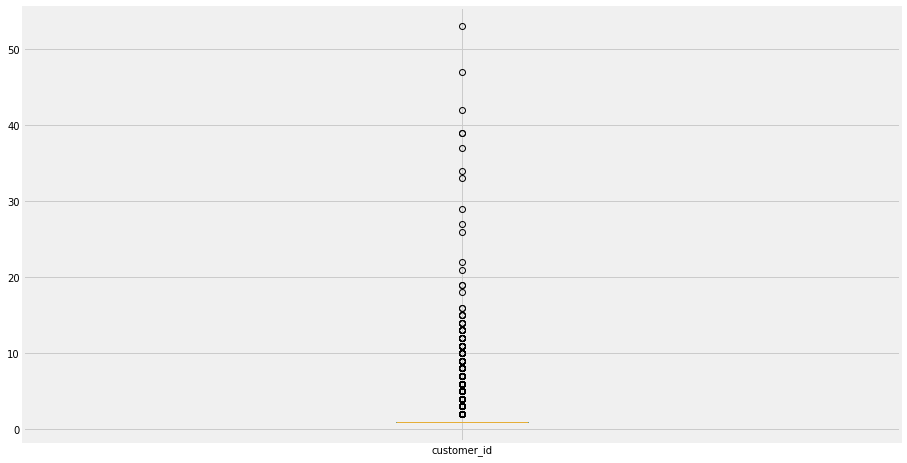

In [157]:
customer_count.plot.box(column='customer_id', figsize=(14, 8))
plt.show()

In [158]:
customer_count = customer_count.reset_index()

In [159]:
customer_count = customer_count.rename(columns={'index': 'customer_id', 'customer_id': 'transaction_count'})

In [160]:
customer_count

,customer_id,transaction_count
0,98685,53
1,427973,47
2,158374,42
3,3189,39
4,50769,39
...,...,...
39511,6453,1
39512,135470,1
39513,433637,1
39514,544210,1


In [161]:
customer_count.describe()

,customer_id,transaction_count
count,39516.000000,39516.000000
mean,441718.221784,1.338673
std,202883.300099,1.107102
min,46.000000,1.000000
25%,375525.500000,1.000000
50%,518977.500000,1.000000
75%,590067.250000,1.000000
max,672308.000000,53.000000


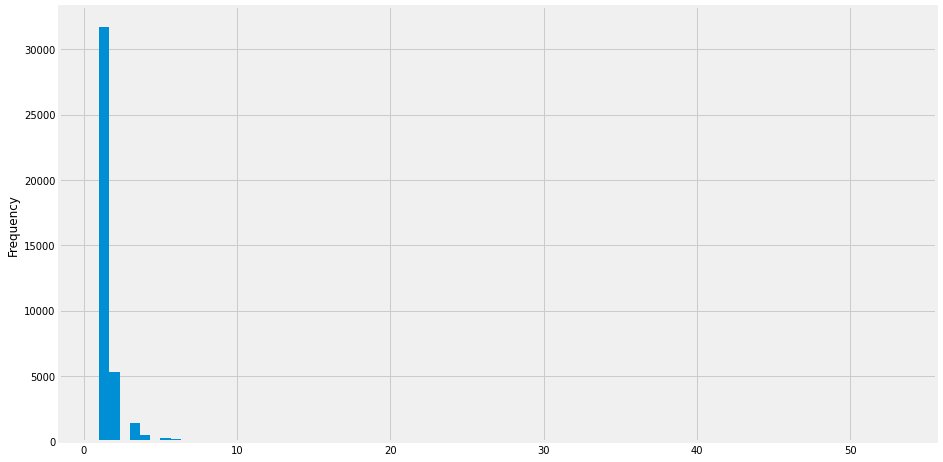

In [162]:
customer_count.transaction_count.plot.hist(bins=78, figsize=(14, 8))
plt.show()

In [179]:
customer_count.isnull().sum()

customer_id          0
transaction_count    0
dtype: int64

In [183]:
df3 = df[(df.type == 'PAYMENT') & (df.state == 'COMPLETED')].merge(customer_count, on='customer_id', how='left')
df3

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,transaction_count
0,970657,72297,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04,5
1,970658,478028,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14,1
2,970669,478033,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,TOSS,CARD,영상 편집,2020-12-02,1
3,970671,469860,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,없음,0.0,263000.0,TOSS,CARD,없음,2020-11-27,1
4,970676,478035,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,TOSS,CARD,프론트엔드 개발,2021-02-02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52894,1364969,669238,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23,1
52895,1364976,384003,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,없음,0.0,149000.0,KAKAO,CARD,영상 편집,2020-12-02,2
52896,1364991,670891,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31,1
52897,1364996,640697,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15,1


In [184]:
once = df3[df3.transaction_count == 1]
retention = df3[df3.transaction_count > 1]

In [185]:
once

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,transaction_count
1,970658,478028,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14,1
2,970669,478033,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,TOSS,CARD,영상 편집,2020-12-02,1
3,970671,469860,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,없음,0.0,263000.0,TOSS,CARD,없음,2020-11-27,1
4,970676,478035,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,TOSS,CARD,프론트엔드 개발,2021-02-02,1
5,970682,478031,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000,없음,0.0,299000.0,TOSS,CARD,없음,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52893,1364956,545804,PAYMENT,COMPLETED,프로모션 : 디자인 맥북 pro 패스(9월 현물 프리패스),디자인,올인원,2021-09-25 13:25:49,1800000,없음,0.0,1800000.0,INICIS,CARD,없음,NaT,1
52894,1364969,669238,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23,1
52896,1364991,670891,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31,1
52897,1364996,640697,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15,1


In [186]:
retention

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,transaction_count
0,970657,72297,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04,5
14,970730,445723,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:15:46,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,TOSS,CARD,프론트엔드 개발,2021-02-02,2
16,970740,474451,PAYMENT,COMPLETED,올인원 패키지 : 디지털 마케팅 MAX 2020,마케팅,올인원,2021-03-28 16:28:42,114500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,134500.0,TOSS,CARD,디지털마케팅,NaT,6
17,970746,478085,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 PPT 제작/디자인,업무 생산성,올인원,2021-03-28 16:34:17,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,TOSS,CARD,PPT/보고서,2021-03-10,2
18,970750,478091,PAYMENT,COMPLETED,프로모션 : 매출의 판도를 바꾸는 마케팅 한끝세트 (3월 프리패스),마케팅,올인원,2021-03-28 16:35:04,299000,없음,0.0,299000.0,TOSS,CARD,없음,NaT,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52879,1364842,638903,PAYMENT,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-25 10:56:03,159000,[WELCOME] 온라인 강의 1만원 할인쿠폰,10000.0,169000.0,KAKAO,POINT,영상 편집,2021-08-17,2
52883,1364869,638903,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 11:22:07,139000,[WELCOME] 온라인 강의 1만원 할인쿠폰,10000.0,149000.0,KAKAO,POINT,영상 편집,2020-12-02,2
52887,1364889,46138,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 부동산 경매/공매,투자/재테크,올인원,2021-09-25 11:55:19,189000,없음,0.0,189000.0,INICIS,CARD,부동산 투자,2021-08-23,4
52892,1364929,120686,PAYMENT,COMPLETED,[한정판매] 자연어 A-Z 끝장 패키지(~9월),데이터사이언스,올인원,2021-09-25 12:29:39,481000,없음,0.0,481000.0,INICIS,CARD,없음,NaT,3


In [187]:
fir_sum = once.transaction_amount.sum()
fir_sum

5775209899

In [188]:
once.sale_price.sum()

6353926288.0

In [189]:
ret_sales = pd.pivot_table(
    data=retention, values=['transaction_amount', 'sale_price'], index='transaction_count', aggfunc=[sum, np.mean]
)
ret_sales.columns = ['_'.join([item[1], item[0]]) for item in ret_sales.columns.values]
ret_sales['user_count'] = ret_sales['sale_price_sum'] / ret_sales['sale_price_mean'] / ret_sales.index
ret_sales = ret_sales.astype({'user_count': int})
ret_sales

,sale_price_sum,transaction_amount_sum,sale_price_mean,transaction_amount_mean,user_count
transaction_count,,,,,
2,1.801430e+09,1485312500,169307.332237,139597.039474,5320
3,7.468228e+08,611150734,178580.291966,146138.386896,1394
4,3.140025e+08,249774283,153621.581213,122198.768591,511
5,2.150701e+08,170934982,170015.883794,135126.467984,253
6,1.370988e+08,109649970,160914.079812,128697.147887,142
7,6.505586e+07,49591039,145213.982143,110694.283482,64
8,4.655318e+07,34982530,149208.919872,112123.493590,39
9,3.311210e+07,23807200,147164.902222,105809.777778,25
10,2.835490e+07,21271110,141774.520000,106355.550000,20


In [194]:
ret_category = pd.pivot_table(
    data=retention, values='id', index=['transaction_count', 'category_title'], aggfunc=[sum, np.mean, lambda x: np.sum(x)/np.mean(x)]
)
ret_category

sum          mean <lambda>
                                          id            id       id
transaction_count category_title                                   
2                 교육                55914484  1.189670e+06     47.0
                  데이터사이언스         1747009347  1.155429e+06   1512.0
                  디자인             1171563810  1.172737e+06    999.0
                  마케팅              913910469  1.165702e+06    784.0
                  부동산/금융           729982213  1.177391e+06    620.0
...                                      ...           ...      ...
53                부동산/금융             6740518  1.348104e+06      5.0
                  업무 생산성             9509377  1.188672e+06      8.0
                  영상/3D              4998365  1.249591e+06      4.0
                  투자/재테크             3955914  1.318638e+06      3.0
                  프로그래밍             19435850  1.214741e+06     16.0

[244 rows x 3 columns]

In [208]:
ret_category.index

MultiIndex([( 2,      '교육'),
            ( 2, '데이터사이언스'),
            ( 2,     '디자인'),
            ( 2,     '마케팅'),
            ( 2,  '부동산/금융'),
            ( 2,    '비즈니스'),
            ( 2,  '업무 생산성'),
            ( 2,   '영상/3D'),
            ( 2,   '지식콘텐츠'),
            ( 2,  '크리에이티브'),
            ...
            (47,  '투자/재테크'),
            (47,   '프로그래밍'),
            (53, '데이터사이언스'),
            (53,     '디자인'),
            (53,     '마케팅'),
            (53,  '부동산/금융'),
            (53,  '업무 생산성'),
            (53,   '영상/3D'),
            (53,  '투자/재테크'),
            (53,   '프로그래밍')],
           names=['transaction_count', 'category_title'], length=244)

### Q1: 2번 구매를 한 사람들은 어떤 카테고리의 강의를 많이 들었을까?

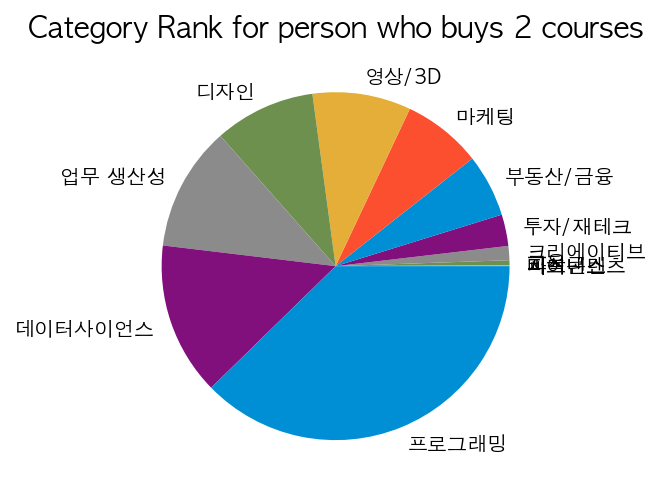

In [226]:
ax = ret_category.loc[(2,), ('<lambda>', 'id')].sort_values().plot.pie()
ax.set_title('Category Rank for person who buys 2 courses')
ax.set_ylabel('')
plt.show()

A1:
1. 프로그래밍
2. 데이터사이언스
3. 업무 생산성
4. 디자인
5. 영상/3D
6. 마케팅

### Q2: 구매횟수별 유저의 수는 얼마나 될까?

In [386]:
sales = pd.pivot_table(
    data=df3, values=['transaction_amount', 'sale_price', 'coupon_discount_amount'], index='transaction_count', aggfunc=[sum, np.mean]
)
sales.columns = ['_'.join([item[1], item[0]]) for item in sales.columns.values]
sales['user_count'] = sales['sale_price_sum'] / sales['sale_price_mean'] / sales.index
sales = sales.astype({'user_count': int})
sales

,coupon_discount_amount_sum,sale_price_sum,transaction_amount_sum,coupon_discount_amount_mean,sale_price_mean,transaction_amount_mean,user_count
transaction_count,,,,,,,
1,588652090.0,6.353926e+09,5775209899,18575.912462,200508.892297,182246.517688,31689
2,328984475.0,1.801430e+09,1485312500,30919.593515,169307.332237,139597.039474,5320
3,131501970.0,7.468228e+08,611150734,31444.756098,178580.291966,146138.386896,1394
4,66577655.0,3.140025e+08,249774283,32572.238258,153621.581213,122198.768591,511
5,46089890.0,2.150701e+08,170934982,36434.695652,170015.883794,135126.467984,253
6,28182320.0,1.370988e+08,109649970,33077.840376,160914.079812,128697.147887,142
7,16446020.0,6.505586e+07,49591039,36709.866071,145213.982143,110694.283482,64
8,12023350.0,4.655318e+07,34982530,38536.378205,149208.919872,112123.493590,39
9,9423900.0,3.311210e+07,23807200,41884.000000,147164.902222,105809.777778,25


In [239]:
sales.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18,
            19, 21, 22, 26, 27, 29, 33, 34, 37, 39, 42, 47, 53],
           dtype='int64', name='transaction_count')

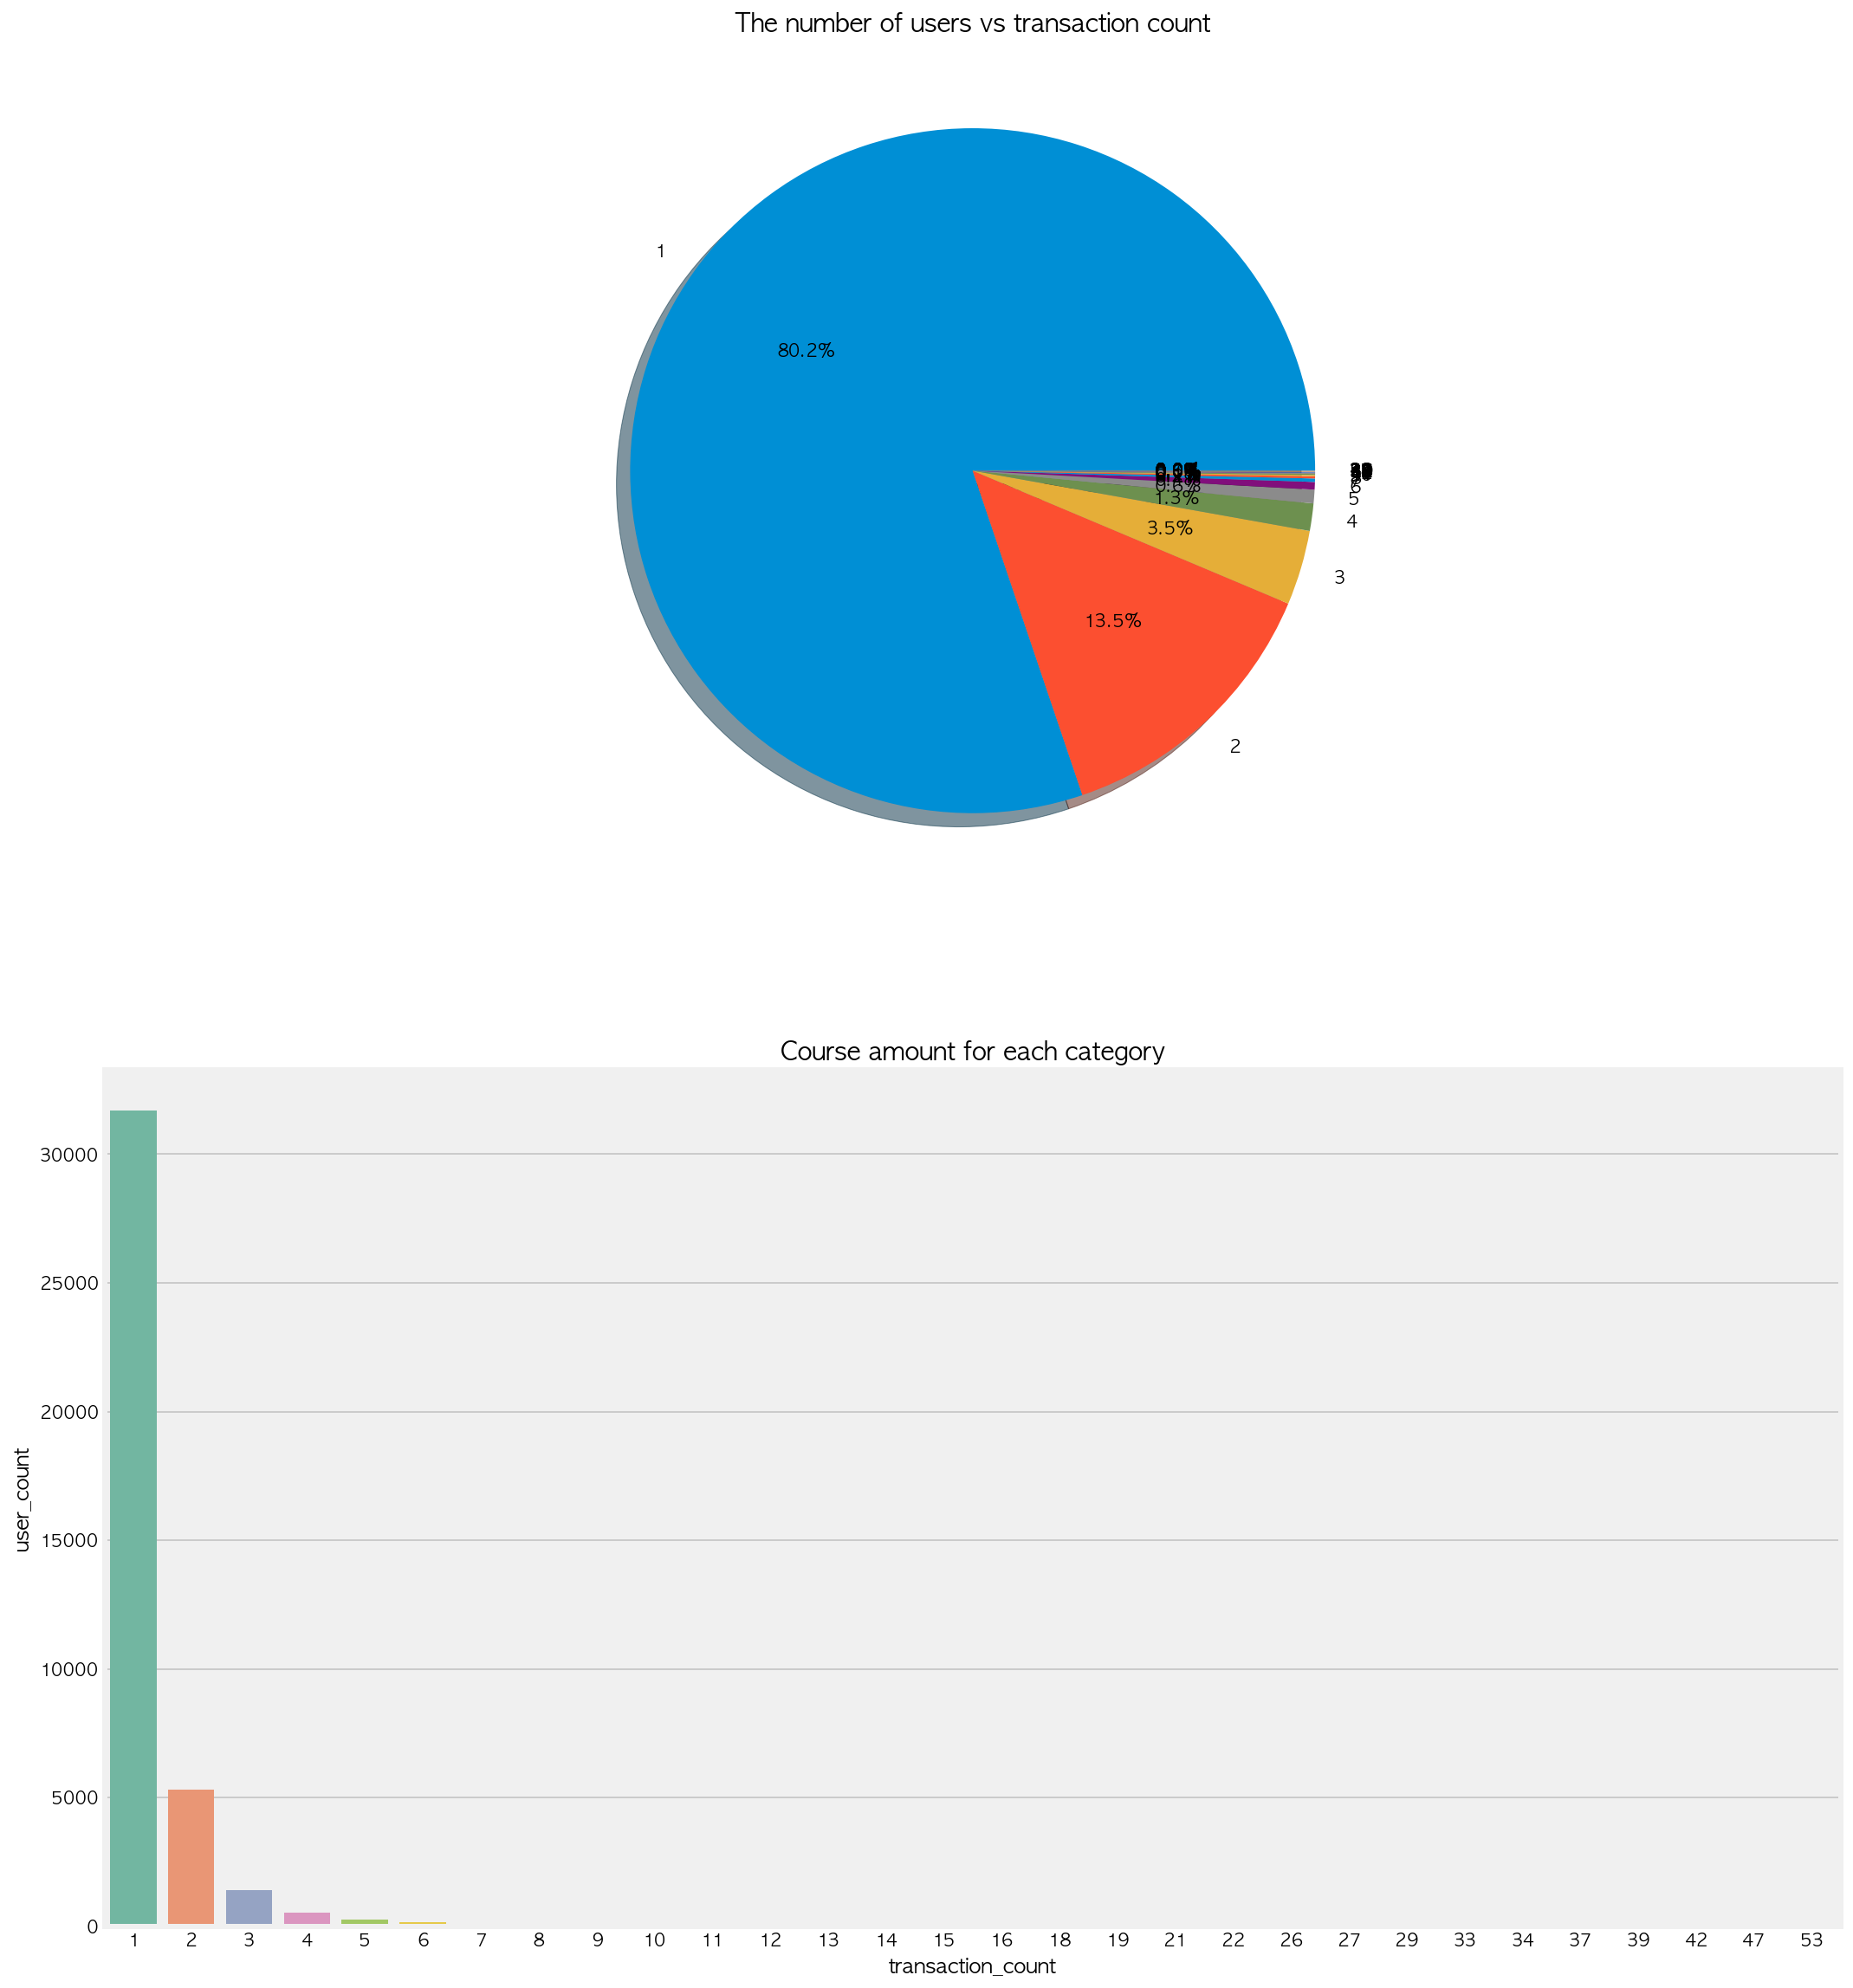

In [257]:
_, ax = plt.subplots(2, 1, figsize=(16,20))
ax[0].pie(sales.user_count, labels=sales.index,
          autopct='%1.1f%%', shadow=True)
ax[0].set_title('The number of users vs transaction count')
sns.barplot(data=sales, x=sales.index, y='user_count', ax=ax[1], palette='Set2')
ax[1].set_title('Course amount for each category')
plt.show()

### Q2-1: (재구매의 경우에만) 구매횟수별 유저의 수는 얼마나 될까?

In [374]:
ret_sales

,sale_price_sum,transaction_amount_sum,sale_price_mean,transaction_amount_mean,user_count
transaction_count,,,,,
2,1.801430e+09,1485312500,169307.332237,139597.039474,5320
3,7.468228e+08,611150734,178580.291966,146138.386896,1394
4,3.140025e+08,249774283,153621.581213,122198.768591,511
5,2.150701e+08,170934982,170015.883794,135126.467984,253
6,1.370988e+08,109649970,160914.079812,128697.147887,142
7,6.505586e+07,49591039,145213.982143,110694.283482,64
8,4.655318e+07,34982530,149208.919872,112123.493590,39
9,3.311210e+07,23807200,147164.902222,105809.777778,25
10,2.835490e+07,21271110,141774.520000,106355.550000,20


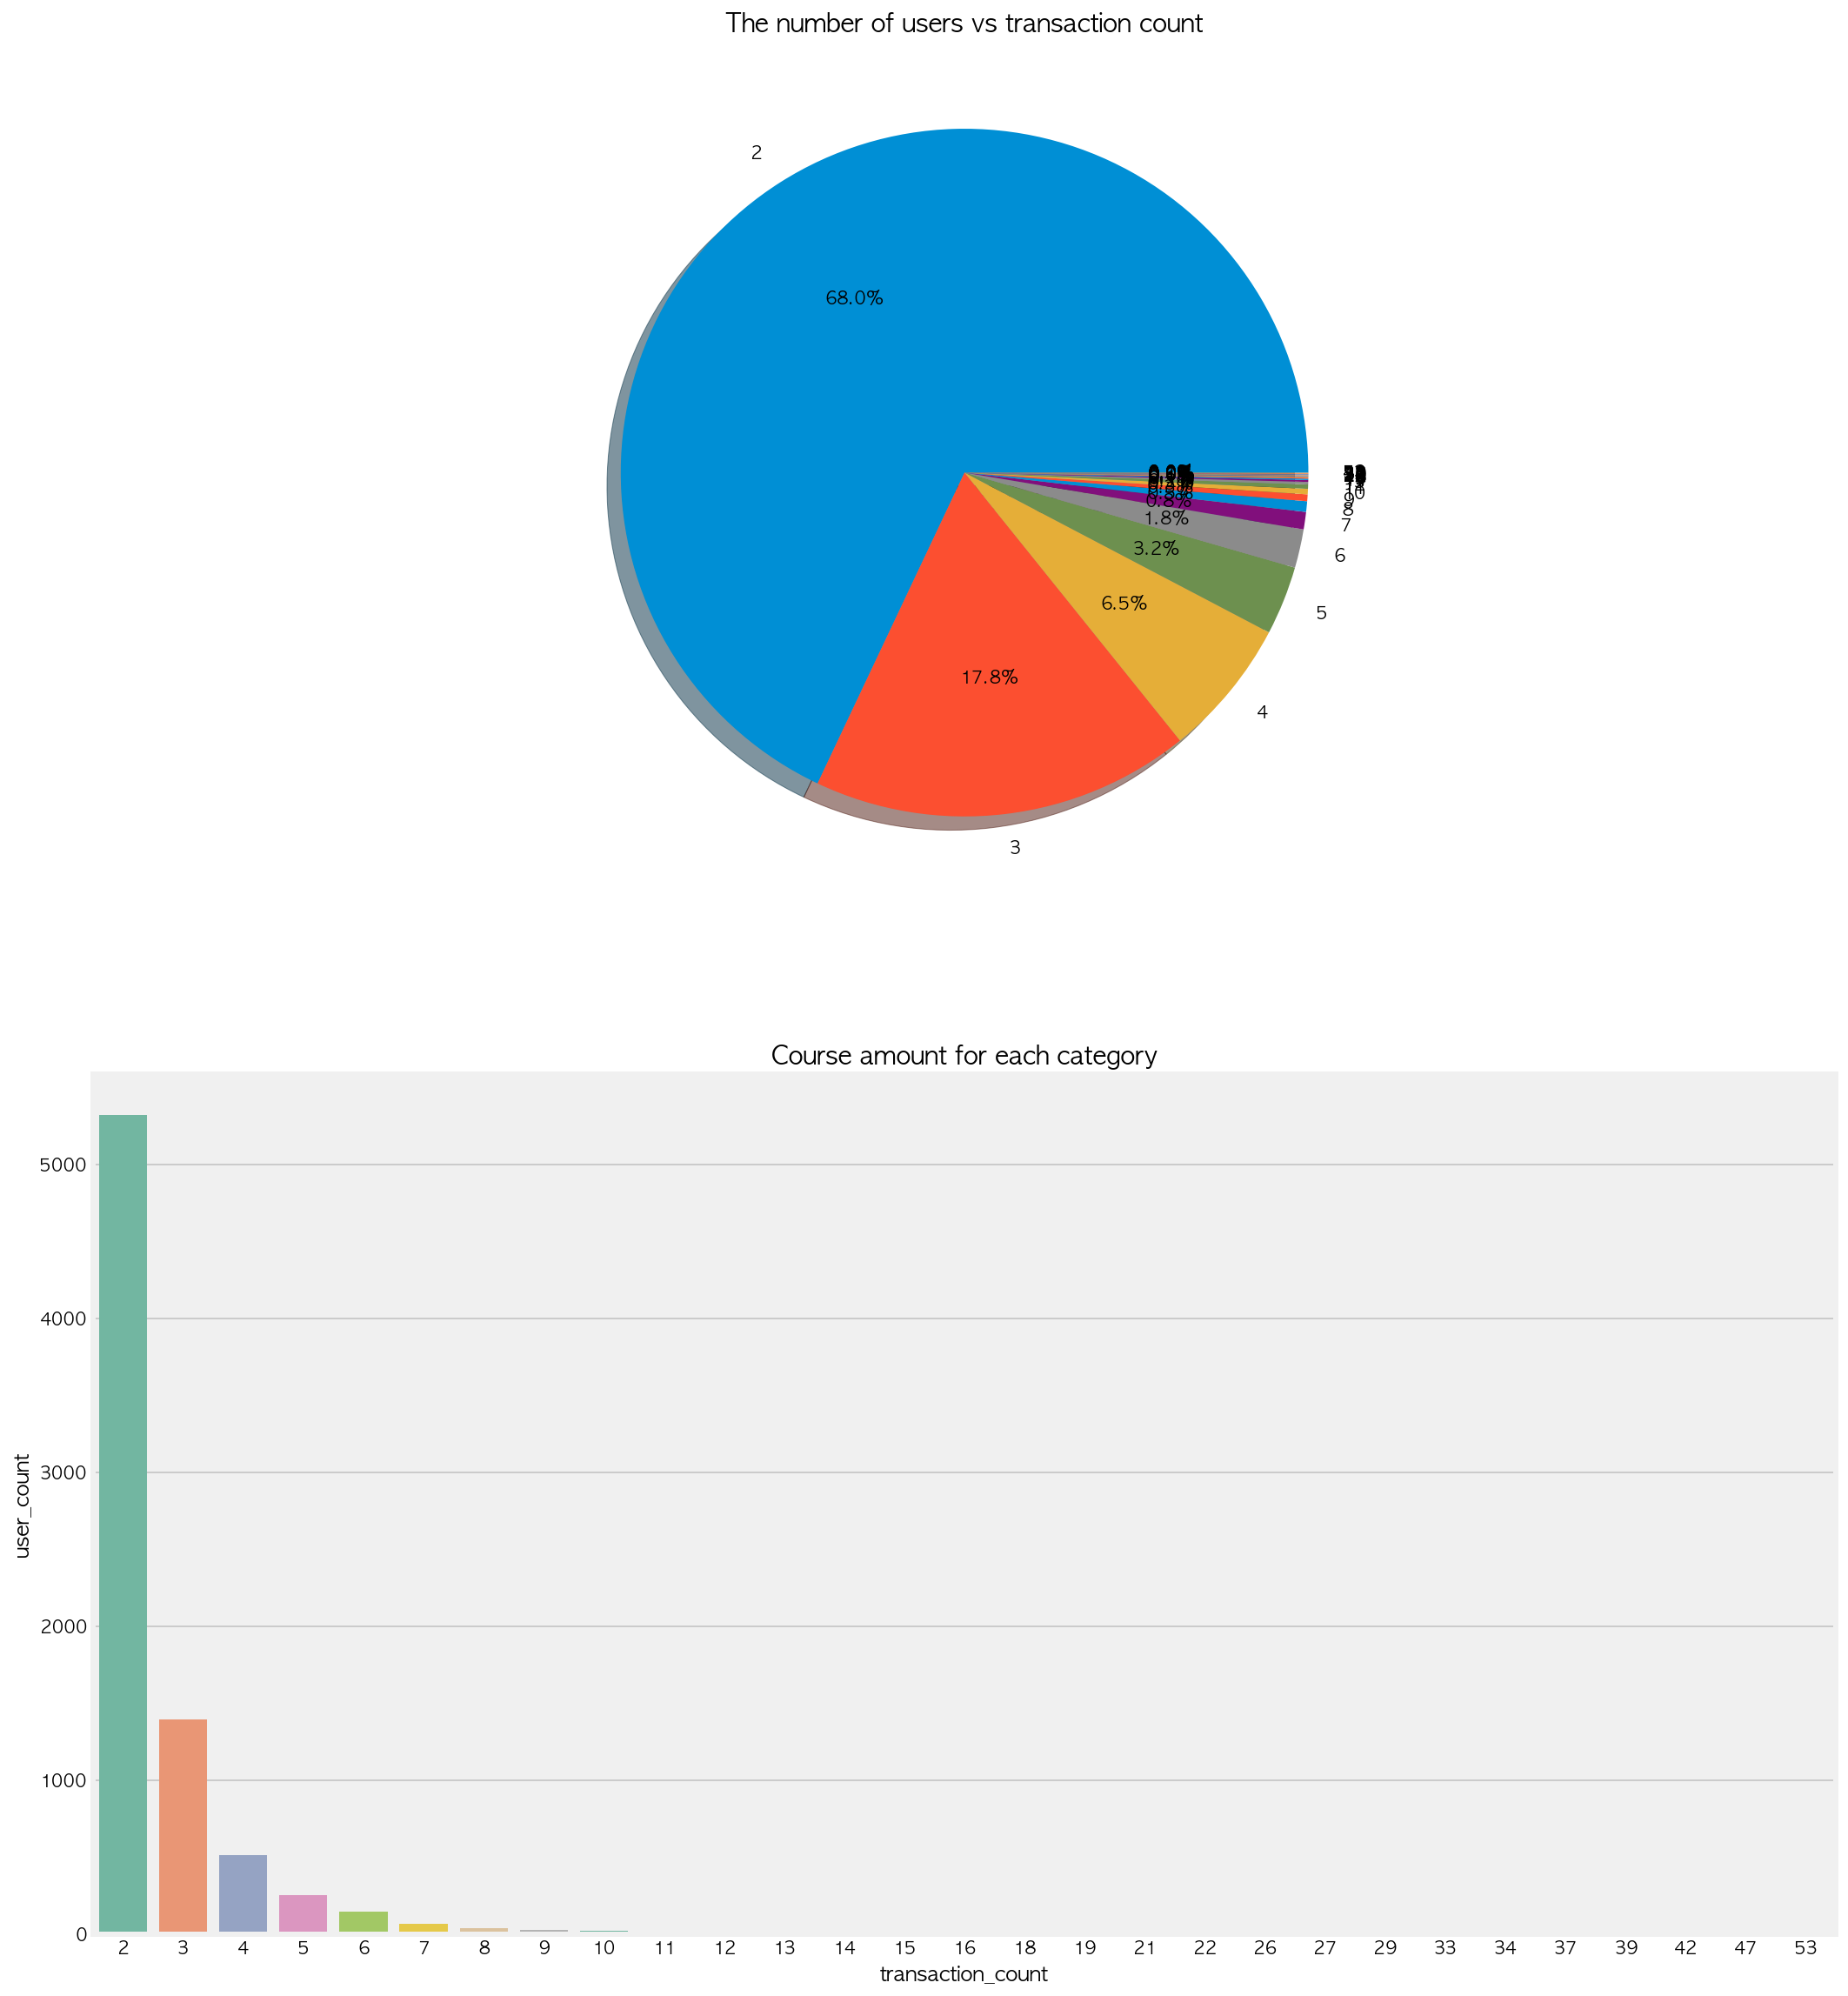

In [259]:
_, ax = plt.subplots(2, 1, figsize=(16,20))
ax[0].pie(ret_sales.user_count, labels=ret_sales.index,
          autopct='%1.1f%%', shadow=True)
ax[0].set_title('The number of users vs transaction count')
sns.barplot(data=ret_sales, x=ret_sales.index, y='user_count', ax=ax[1], palette='Set2')
ax[1].set_title('Course amount for each category')
plt.show()

### Q3. 구매횟수별 매출분포?

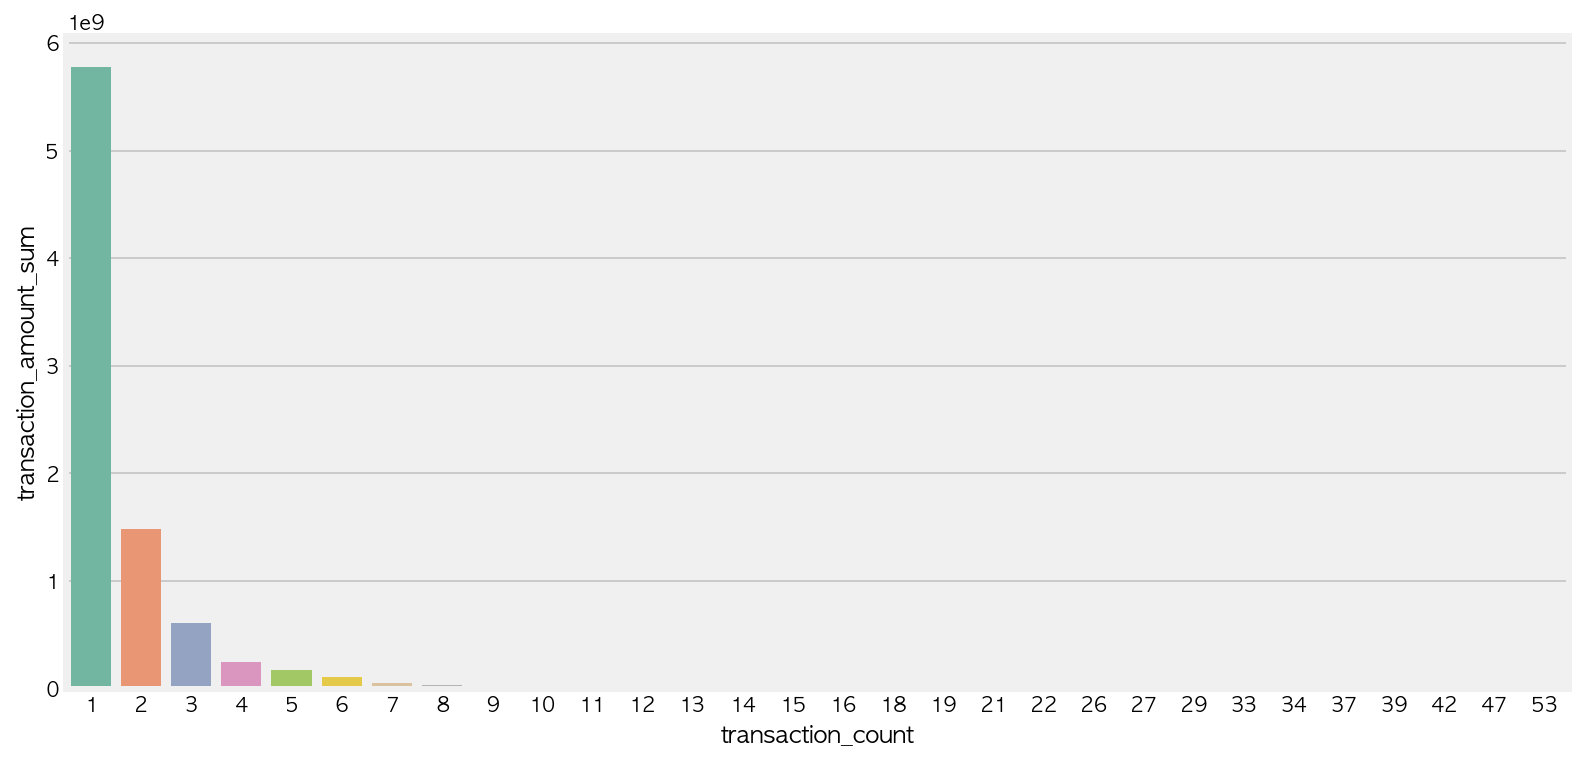

In [357]:
plt.figure(figsize=(12,6))
sns.barplot(data=sales, x=sales.index, y='transaction_amount_sum', palette='Set2')
plt.show()

interpolation with exponential function

In [387]:
sales['log_u_count'] = np.log10(sales.user_count)

In [388]:
sales['log_t_amount'] = np.log10(sales.transaction_amount_sum)

In [389]:
sales['log_s_price'] = np.log10(sales.sale_price_sum)

In [390]:
sales

,coupon_discount_amount_sum,sale_price_sum,transaction_amount_sum,coupon_discount_amount_mean,sale_price_mean,transaction_amount_mean,user_count,log_u_count,log_t_amount,log_s_price
transaction_count,,,,,,,,,,
1,588652090.0,6.353926e+09,5775209899,18575.912462,200508.892297,182246.517688,31689,4.500909,9.761568,9.803042
2,328984475.0,1.801430e+09,1485312500,30919.593515,169307.332237,139597.039474,5320,3.725912,9.171818,9.255617
3,131501970.0,7.468228e+08,611150734,31444.756098,178580.291966,146138.386896,1394,3.144263,8.786148,8.873218
4,66577655.0,3.140025e+08,249774283,32572.238258,153621.581213,122198.768591,511,2.708421,8.397548,8.496933
5,46089890.0,2.150701e+08,170934982,36434.695652,170015.883794,135126.467984,253,2.403121,8.232831,8.332580
6,28182320.0,1.370988e+08,109649970,33077.840376,160914.079812,128697.147887,142,2.152288,8.040009,8.137034
7,16446020.0,6.505586e+07,49591039,36709.866071,145213.982143,110694.283482,64,1.806180,7.695403,7.813286
8,12023350.0,4.655318e+07,34982530,38536.378205,149208.919872,112123.493590,39,1.591065,7.543851,7.667949
9,9423900.0,3.311210e+07,23807200,41884.000000,147164.902222,105809.777778,25,1.397940,7.376708,7.519987


### Q4: Could we predict the number of users for each transaction?

In [391]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
line_fitter.fit(sales.iloc[:19].index.values.reshape(-1,1), sales.iloc[:19].log_u_count)

LinearRegression()

In [392]:
line_fitter.coef_

array([-0.20193026])

In [393]:
line_fitter.intercept_

3.621692037344604

In [394]:
sales['lm_log_u_count'] = line_fitter.coef_[0] * sales.index + line_fitter.intercept_

In [395]:
sales.loc[18:,'lm_log_u_count'] = 0

In [396]:
sales

,coupon_discount_amount_sum,sale_price_sum,transaction_amount_sum,coupon_discount_amount_mean,sale_price_mean,transaction_amount_mean,user_count,log_u_count,log_t_amount,log_s_price,lm_log_u_count
transaction_count,,,,,,,,,,,
1,588652090.0,6.353926e+09,5775209899,18575.912462,200508.892297,182246.517688,31689,4.500909,9.761568,9.803042,3.419762
2,328984475.0,1.801430e+09,1485312500,30919.593515,169307.332237,139597.039474,5320,3.725912,9.171818,9.255617,3.217832
3,131501970.0,7.468228e+08,611150734,31444.756098,178580.291966,146138.386896,1394,3.144263,8.786148,8.873218,3.015901
4,66577655.0,3.140025e+08,249774283,32572.238258,153621.581213,122198.768591,511,2.708421,8.397548,8.496933,2.813971
5,46089890.0,2.150701e+08,170934982,36434.695652,170015.883794,135126.467984,253,2.403121,8.232831,8.332580,2.612041
6,28182320.0,1.370988e+08,109649970,33077.840376,160914.079812,128697.147887,142,2.152288,8.040009,8.137034,2.410110
7,16446020.0,6.505586e+07,49591039,36709.866071,145213.982143,110694.283482,64,1.806180,7.695403,7.813286,2.208180
8,12023350.0,4.655318e+07,34982530,38536.378205,149208.919872,112123.493590,39,1.591065,7.543851,7.667949,2.006250
9,9423900.0,3.311210e+07,23807200,41884.000000,147164.902222,105809.777778,25,1.397940,7.376708,7.519987,1.804320


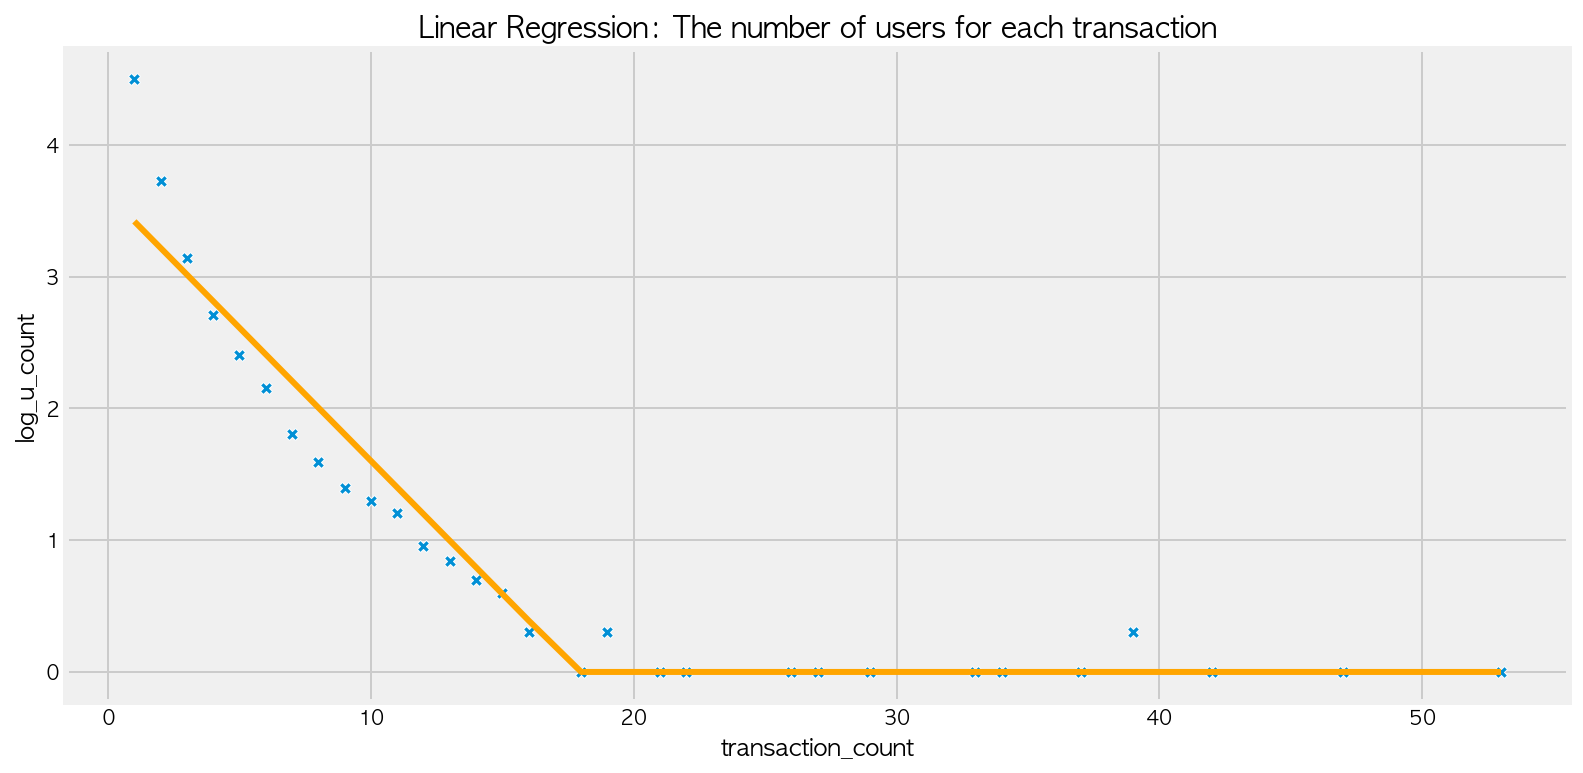

In [397]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales, x=sales.index, y='log_u_count', marker='X')
sns.lineplot(data=sales, x=sales.index, y='lm_log_u_count', color='orange', linewidth=3)
plt.title('Linear Regression: The number of users for each transaction')
plt.show()

In [400]:
pd.concat([sales.user_count, (10 ** sales.lm_log_u_count) // 1], axis=1).astype({'lm_log_u_count': int})

,user_count,lm_log_u_count
transaction_count,,
1,31689,2628
2,5320,1651
3,1394,1037
4,511,651
5,253,409
6,142,257
7,64,161
8,39,101
9,25,63


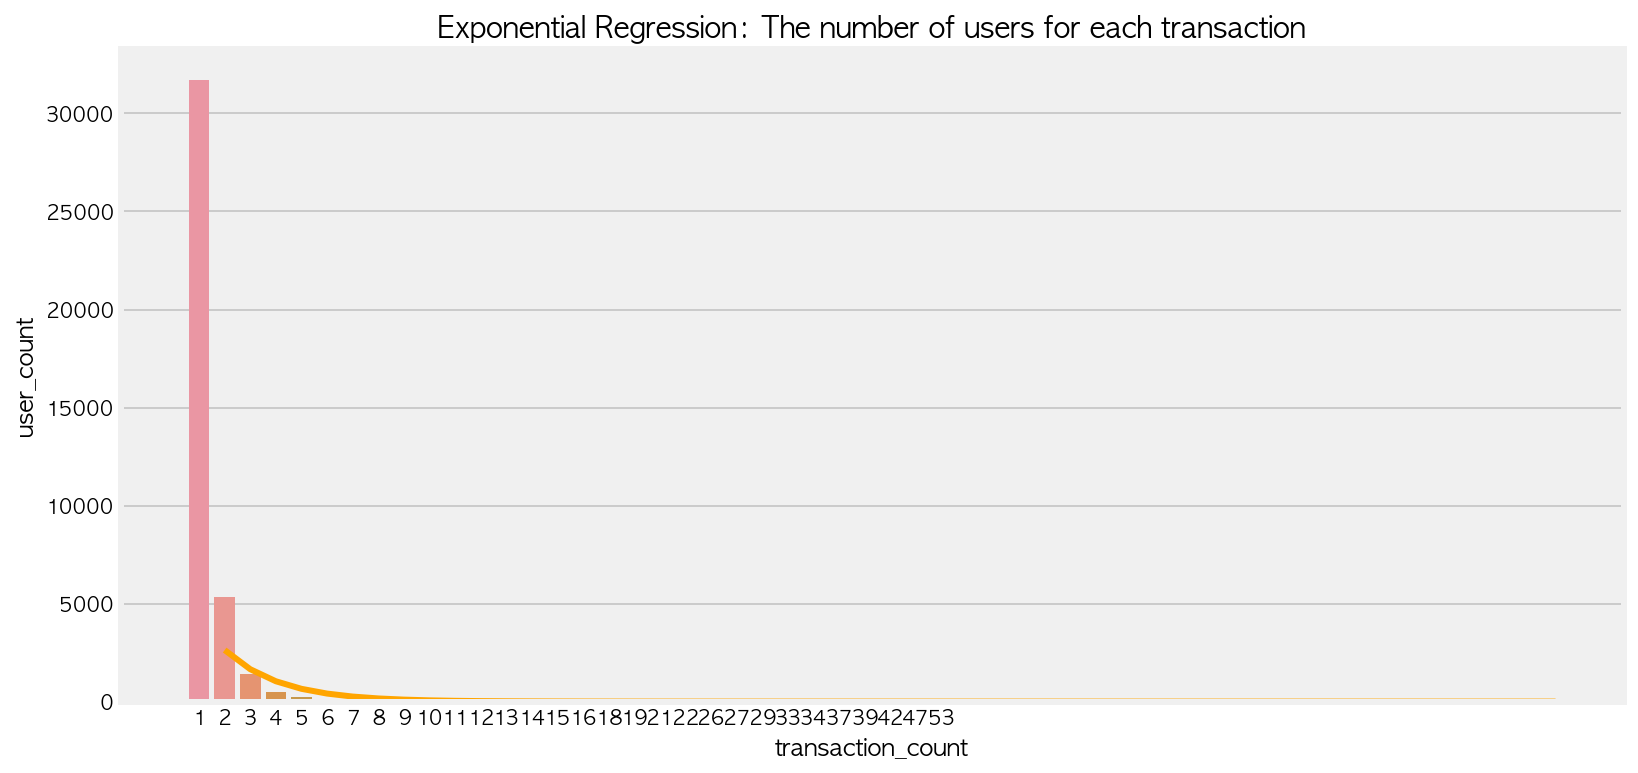

In [401]:
plt.figure(figsize=(12, 6))
sns.barplot(x=sales.index, y=sales.user_count)
sns.lineplot(x=sales.index, y=(10 ** sales.lm_log_u_count), color='orange', linewidth=3)
plt.title('Exponential Regression: The number of users for each transaction')
plt.show()

In [140]:
retention[retention.transaction_count == 39]

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,transaction_count
8301,994232,1189,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,프로그래밍,올인원,2021-04-06 10:22:53,0,패캐머_온라인 쿠폰! (CRM팀),112000.0,112000.0,TOSS,PROMOTION,백엔드 개발,2021-02-01 00:00:00,39
14115,1013445,1189,PAYMENT,COMPLETED,권오상 회계사의 자금조달 분석 및 가치평가,부동산/금융,캠프,2021-04-16 15:42:55,0,[무료수강권] 권오상 회계사의 자금조달 및 가치평가_내부 검수용,800000.0,800000.0,TOSS,PROMOTION,없음,NaT,39
17063,1022996,1189,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초 (수강시간...,부동산/금융,올인원,2021-04-22 17:32:05,0,패캐머_온라인 쿠폰! (CRM팀),255000.0,255000.0,TOSS,PROMOTION,회계/재무/세무,2021-04-22 00:00:00,39
20568,1033211,1189,PAYMENT,COMPLETED,올인원 패키지 : 파이썬을 활용한 이커머스 데이터 분석,데이터사이언스,올인원,2021-04-27 13:15:55,0,패캐머_온라인 쿠폰! (CRM팀),100500.0,100500.0,TOSS,PROMOTION,데이터분석,2020-09-11 00:00:00,39
23637,1041903,1189,PAYMENT,COMPLETED,올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵,디자인,올인원,2021-04-30 11:54:23,0,패캐머_온라인 쿠폰! (CRM팀),89600.0,89600.0,TOSS,PROMOTION,디자인툴,2020-10-23 00:00:00,39
27513,1052386,1189,PAYMENT,COMPLETED,올인원 패키지 : 완전정복 시각디자인 기초,디자인,올인원,2021-05-04 17:39:30,0,패캐머_온라인 쿠폰! (CRM팀),171000.0,171000.0,TOSS,PROMOTION,시각디자인,2021-03-16 00:00:00,39
31115,1063021,1189,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편,프로그래밍,올인원,2021-05-10 17:20:49,0,패캐머_온라인 쿠폰! (CRM팀),90000.0,90000.0,TOSS,PROMOTION,개발자 커리어,2021-04-14 00:00:00,39
42742,1103491,1189,PAYMENT,COMPLETED,"올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기",마케팅,올인원,2021-05-28 11:33:39,0,패캐머_온라인 쿠폰! (CRM팀),100000.0,100000.0,TOSS,PROMOTION,데이터마케팅,2021-04-02 00:00:00,39
47659,1118170,1189,PAYMENT,COMPLETED,올인원 패키지 : 딥러닝/인공지능,데이터사이언스,올인원,2021-06-03 11:36:10,0,패캐머_온라인 쿠폰! (CRM팀),173500.0,173500.0,TOSS,PROMOTION,딥러닝/인공지능,2019-07-04 00:00:00,39
47728,1118420,1189,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-06-03 14:21:07,0,패캐머_온라인 쿠폰! (CRM팀),122000.0,122000.0,TOSS,PROMOTION,영상 편집,2020-12-02 00:00:00,39


### Q4: 1번 구매한 고객군과 재구매한 고객군의 매출은 얼만큼 차이가 날까?

In [122]:
ret_sum = pd.pivot_table(
    data=retention, values='transaction_amount', index='transaction_count', aggfunc=sum
).sum().values[0]
ret_sum

4874183188

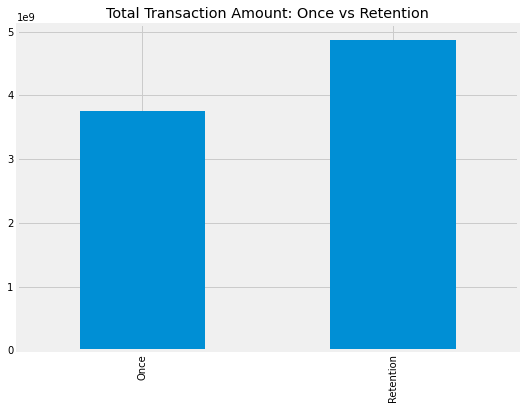

In [125]:
ax = pd.Series({'Once': fir_sum, 'Retention': ret_sum}, name='Total Transaction Amount').plot.bar(figsize=(8, 6))
ax.set_title('Total Transaction Amount: Once vs Retention')
plt.show()

In [94]:
retention

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,transaction_count
2,970657,72297,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04,9
3,970656,72297,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,TOSS,CARD,없음,2021-03-04,9
4,970658,478028,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14,2
5,970655,478028,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,없음,0.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14,2
8,970669,478033,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,TOSS,CARD,영상 편집,2020-12-02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105388,1364976,384003,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,없음,0.0,149000.0,KAKAO,CARD,영상 편집,2020-12-02,2
105390,1364995,640697,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15,2
105391,1364998,670896,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10,2
105392,1364996,640697,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15,2


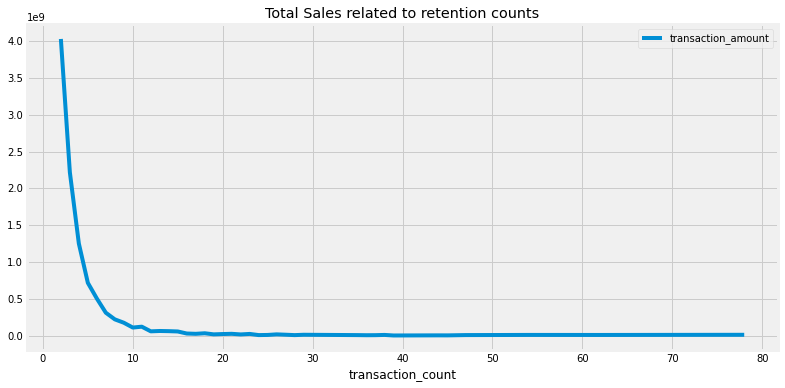

In [102]:
ax = pd.pivot_table(
    data=retention, values='transaction_amount', index='transaction_count', aggfunc=sum
).plot.line(figsize=(12,6))
ax.set_title('Total Sales related to retention counts')
plt.show()

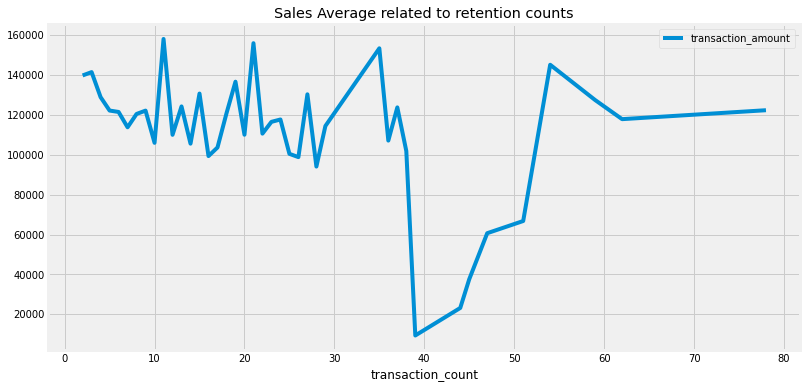

In [103]:
"""
재구매횟수별 고객 1인당 평균 매출
"""

ax = pd.pivot_table(
    data=retention, values='transaction_amount', index='transaction_count', aggfunc=np.mean
).plot.line(figsize=(12,6))
ax.set_title('Sales Average related to retention counts')
plt.show()

In [73]:
"""
retention : 구간 [2,3], [4,6], [7,10], [11,20], [21,40], [41, 78]
"""

''

## Categorical Features

### Course Category
- '투자/재테크'

- '마케팅'

- '프로그래밍'

- '영상/3D'

- '관리'

- '일러스트'

- '데이터사이언스'

- '부동산/금융'

- '비즈니스'

- '디자인'

- '지식콘텐츠'

- '업무 생산성'

- '교육'

- '데이터 사이언스'

- '파이낸스'

- '크리에이티브'

#### Cleaning overlapped data
-> 데이터사이언스가 두번 겹침

So, '데이터 사이언스'를 '데이터사이언스로 변경

In [ ]:
list(set(df[df.category_title == '데이터 사이언스'].index.values))

In [ ]:
df.loc[[47407, 47408, 47447, 47448, 47462, 47477, 47478, 47509, 94948], 'category_title'] = ['데이터사이언스' for i in range(9)]

In [ ]:
list(set(df.category_title.values))

### Amount of course for each category

- course_id가 null인 케이스 분석

In [ ]:
df.course_id.isnull()

In [ ]:
df[df.course_id.isnull()].loc[:, 'course_title']

In [ ]:
mask1 = df.course_id.isnull()
mask2 = df.loc[:, 'course_title'].str.contains('프로모션')
mask3 = df.loc[:, 'course_title'].str.contains('한정판매')
len(df[mask1 & mask2]) + len(df[mask1 & mask3])

In [ ]:
"""
course_id가 null인 케이스 분석
1. 프로모션
2. 한정판매
3. 그 외(NaN, 초격차 패키지, 올인원 패키지, 묶음)

-> 그 외 분석을 위해 차집합 join을 활용
"""
df[mask1].merge(
    df[mask1 & (mask2 | mask3)], on='id', how='left', indicator=True
).query(
    '_merge == "left_only"'
).drop(
    '_merge', 1
)['course_title_x']

In [ ]:
pd.pivot_table(
    data=df, columns='category_title', index='course_title'
).count().index

In [ ]:
pd.pivot_table(
    data=df, columns='category_title', index='course_title'
)['customer_id'].count()

In [214]:
df

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,970634,504760,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,없음,0.0,110500.0,TOSS,VBANK,개발자 커리어,NaT
1,970650,432862,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,TOSS,CARD,영상 편집,2020-12-02
2,970657,72297,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04
3,970656,72297,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,TOSS,CARD,없음,2021-03-04
4,970658,478028,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


### Q5: 카테고리별 강의 분포는 어떻게 되어 있을까?

In [411]:
import hashlib
def make_id(s):
    return int(hashlib.sha1(s.encode("utf-8")).hexdigest(), 16) % (10 ** 6)
df.course_title.apply(make_id)

0         213547
1         542066
2         213923
3         213923
4         943437
           ...  
105414    964583
105415    157569
105416    964583
105417    157569
105418    267101
Name: course_title, Length: 105395, dtype: int64

In [414]:
df['course_id'] = df.course_title.apply(make_id)

In [415]:
df

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,course_id
0,970634,504760,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,없음,0.0,110500.0,TOSS,VBANK,개발자 커리어,NaT,213547
1,970650,432862,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,TOSS,CARD,영상 편집,2020-12-02,542066
2,970657,72297,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04,213923
3,970656,72297,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,TOSS,CARD,없음,2021-03-04,213923
4,970658,478028,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14,943437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15,964583
105415,1364998,670896,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10,157569
105416,1364996,640697,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15,964583
105417,1365005,670896,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10,157569


In [454]:
category_course_table = pd.pivot_table(
    data=df, columns='category_title', index='course_title'
)['customer_id'].count()
category_course_table = category_course_table.rename('course_count')
category_course_table.sort_values(ascending=False, inplace=True)
category_course_table

category_title
교육         879
프로그래밍      214
데이터사이언스    174
크리에이티브      89
마케팅         83
업무 생산성      73
부동산/금융      54
디자인         28
영상/3D       24
비즈니스         9
투자/재테크       8
파이낸스         3
관리           1
일러스트         1
지식콘텐츠        1
Name: course_count, dtype: int64

In [361]:
print(category_course_table.to_markdown())

| category_title   |   course_count |
|:-----------------|---------------:|
| 교육             |            879 |
| 프로그래밍       |            214 |
| 데이터사이언스   |            174 |
| 크리에이티브     |             89 |
| 마케팅           |             83 |
| 업무 생산성      |             73 |
| 부동산/금융      |             54 |
| 디자인           |             28 |
| 영상/3D          |             24 |
| 비즈니스         |              9 |
| 투자/재테크      |              8 |
| 파이낸스         |              3 |
| 관리             |              1 |
| 일러스트         |              1 |
| 지식콘텐츠       |              1 |


| category_title   |   course_count |
|:-----------------|---------------:|
| 교육             |            879 |
| 프로그래밍       |            214 |
| 데이터사이언스   |            174 |
| 크리에이티브     |             89 |
| 마케팅           |             83 |
| 업무 생산성      |             73 |
| 부동산/금융      |             54 |
| 디자인           |             28 |
| 영상/3D          |             24 |
| 비즈니스         |              9 |
| 투자/재테크      |              8 |
| 파이낸스         |              3 |
| 관리             |              1 |
| 일러스트         |              1 |
| 지식콘텐츠       |              1 |

In [ ]:
# import matplotlib
# import matplotlib.font_manager as fm
# fm.get_fontconfig_fonts()
# font_location = 'C:/Users/piy81/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf' # For Windows
# font_name = fm.FontProperties(fname=font_location).get_name()
# matplotlib.rc('font', family=font_name)

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

| category_title   |   course_count |
|:-----------------|---------------:|
| 프로그래밍       |            195 |
| 데이터사이언스   |            140 |
| 크리에이티브     |             76 |
| 마케팅           |             73 |
| 업무 생산성      |             68 |
| 부동산/금융      |             49 |
| 교육             |             39 |
| 디자인           |             28 |
| 영상/3D          |             24 |
| 비즈니스         |              8 |
| 투자/재테크      |              8 |
| 파이낸스         |              2 |
| 관리             |              1 |
| 일러스트         |              1 |
| 지식콘텐츠       |              1 |

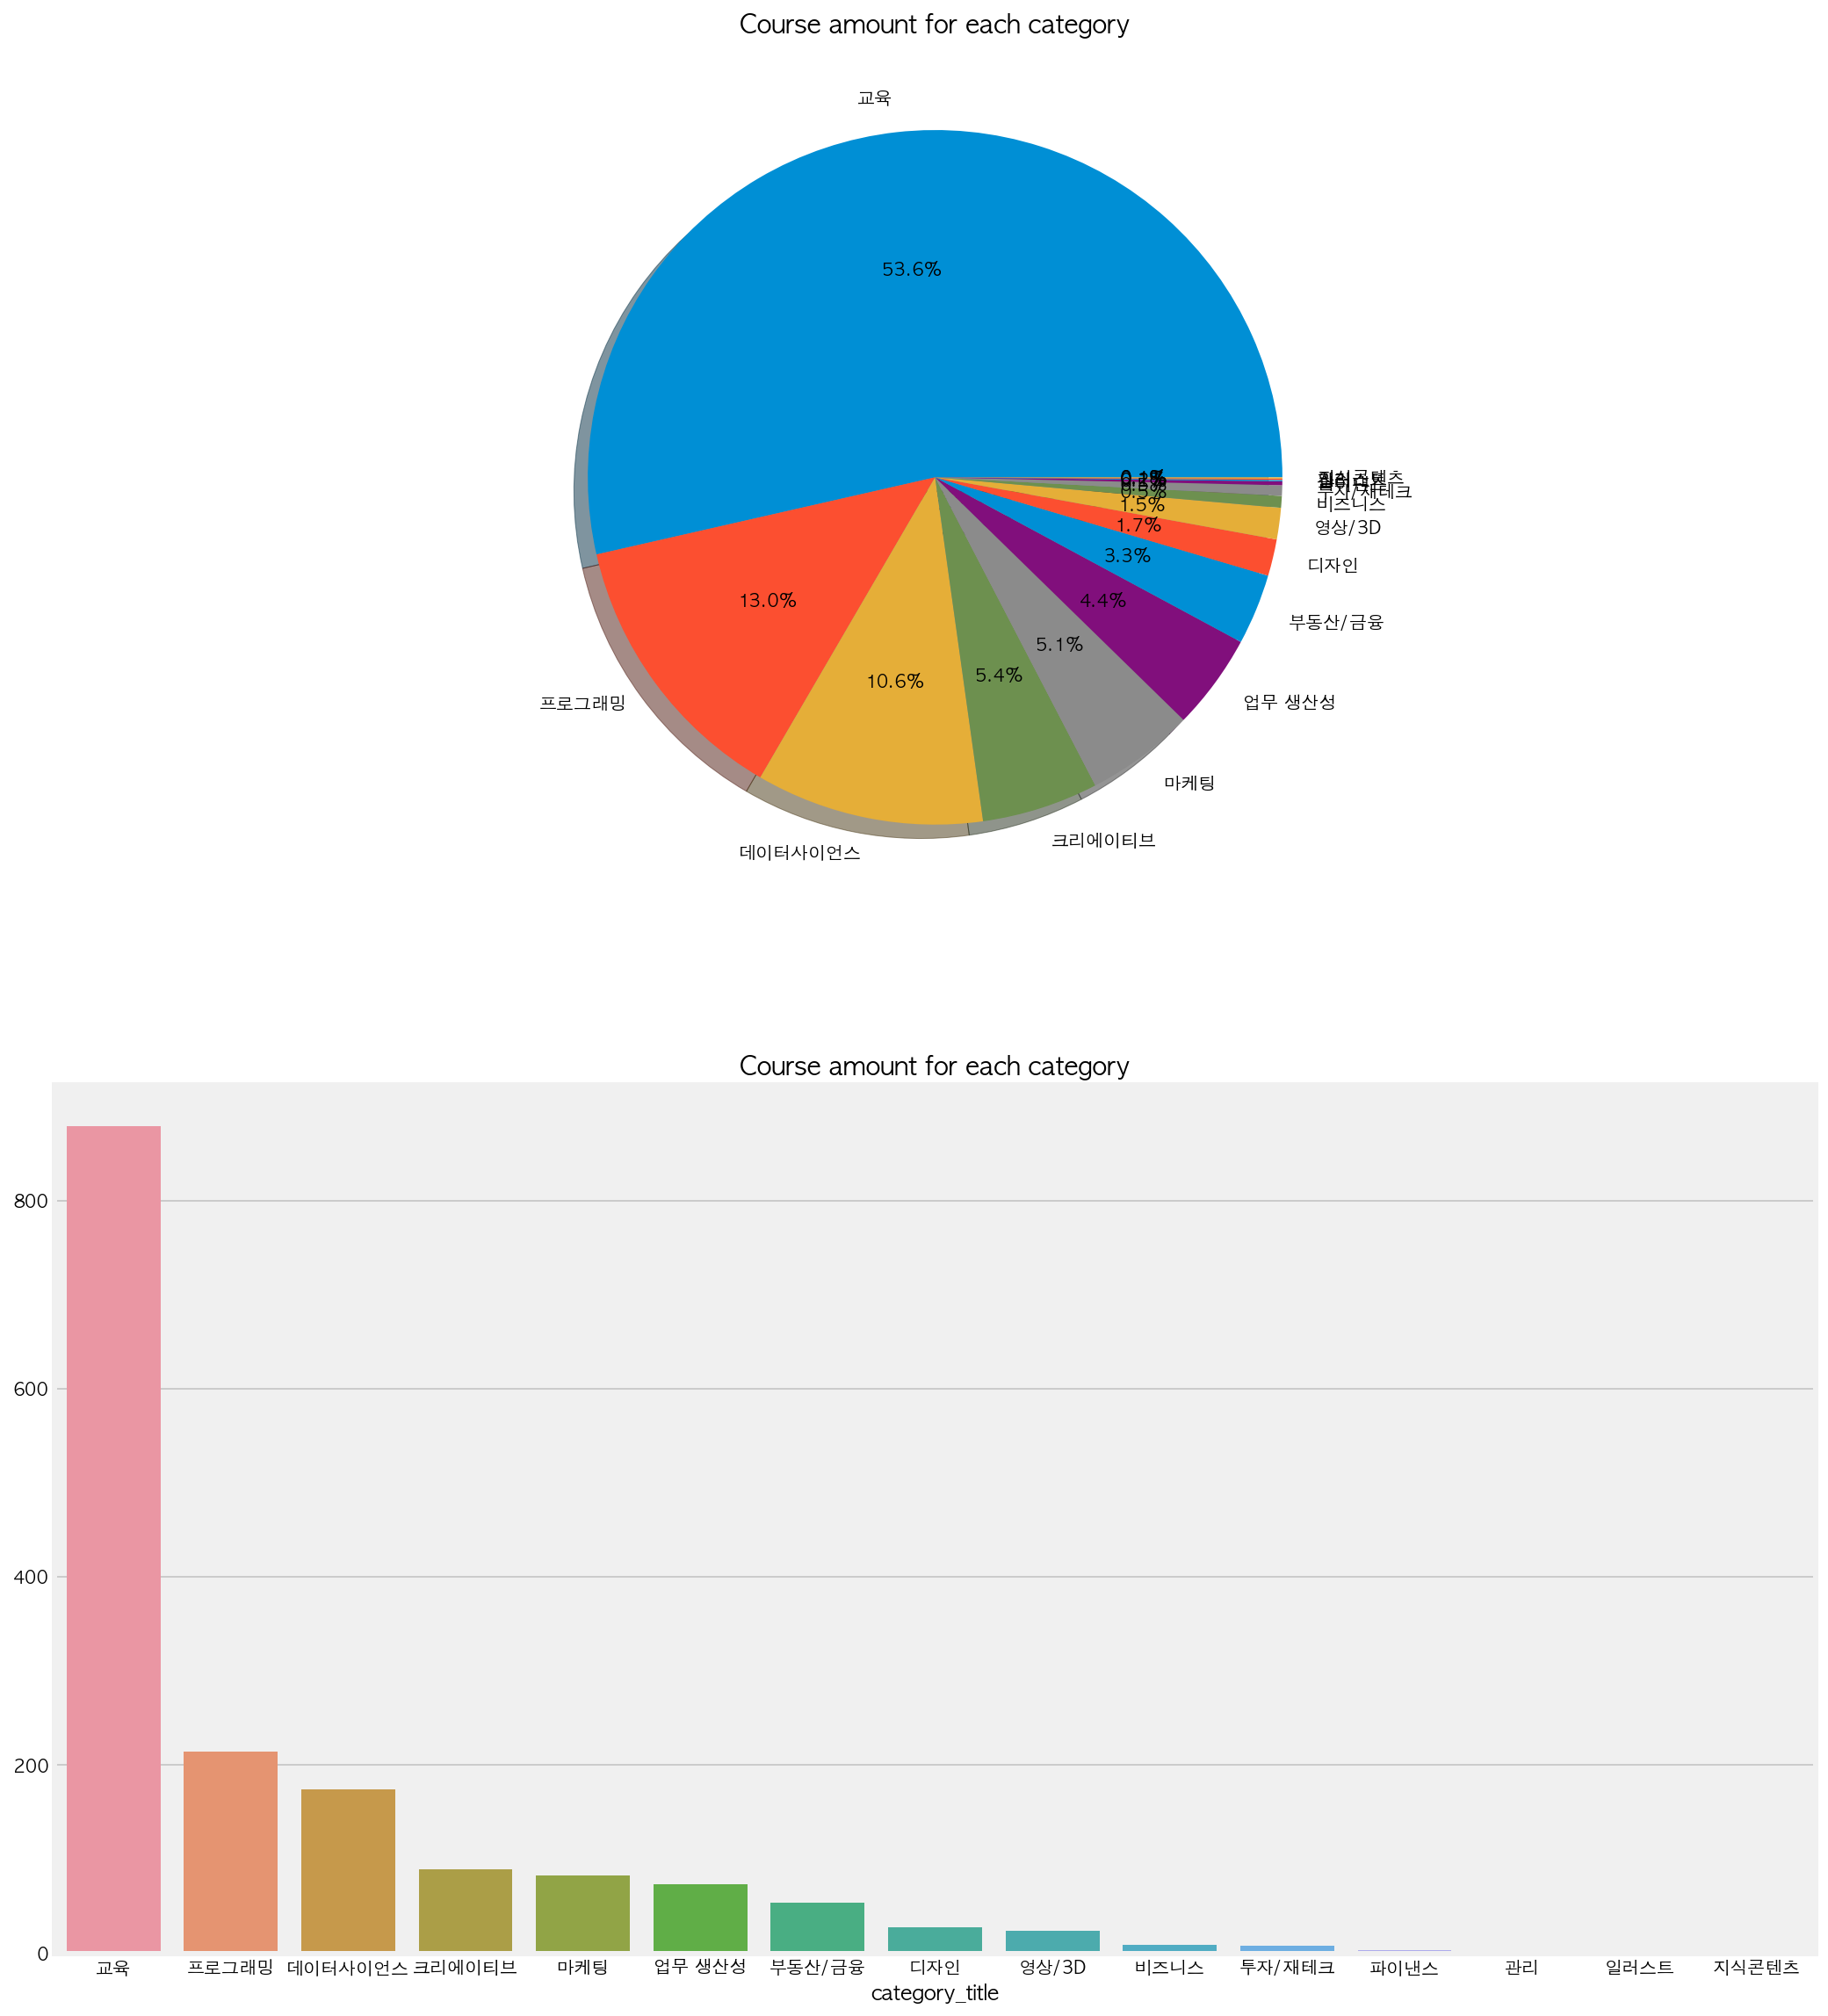

In [362]:
_, ax = plt.subplots(2, 1, figsize=(16,20))
ax[0].pie(category_course_table.values, labels=category_course_table.index,
          autopct='%1.1f%%', shadow=True)
ax[0].set_title('Course amount for each category')
sns.barplot(x=category_course_table.index, y=category_course_table.values, ax=ax[1])
ax[1].set_title('Course amount for each category')
plt.show()

#### Observations:

압도적으로 교육 카테고리의 강의수가 많다.

1. 교육 : 53.6%
2. 프로그래밍 : 
이때 교육 카테고리를 살펴보면, B2B라는 접두어가 전부 붙어 있기 때문에 기업교육 강의자료임을 알 수 있다.



### Sale price for each category

In [ ]:
pd.pivot_table(data=df[df.type == 'PAYMENT'], columns='category_title', index='course_title')['transaction_amount'].sum()

In [ ]:
pd.pivot_table(data=df[df.type == 'REFUND'], columns='category_title', index='course_title')['transaction_amount'].sum()

In [ ]:
pd.pivot_table(data=df[df.type == 'ORDER'], columns='category_title', index='course_title')['transaction_amount'].sum()

In [ ]:
transaction_category = pd.pivot_table(data=df[(df.type == 'PAYMENT') | (df.type == 'REFUND')], 
                                columns='category_title',index='course_title')['transaction_amount'].sum()
transaction_category.rename('transaction amount for each category', inplace=True)
transaction_category.sort_values(ascending=False, inplace=True)
transaction_category

In [ ]:
df.describe()

In [ ]:
sales_category = pd.pivot_table(data=df[(df.type == 'PAYMENT') | (df.type == 'REFUND')], 
                                columns='category_title',index='course_title')['sale_price'].sum()
sales_category.rename('sales for each category', inplace=True)
sales_category.sort_values(ascending=False, inplace=True)
sales_category

In [ ]:
pd.concat([transaction_category, sales_category], axis=1)

In [ ]:
_, ax = plt.subplots(2, 1, figsize=(16,20))
ax[0].pie(sales_category.values, labels=sales_category.index,
          autopct='%1.1f%%', shadow=True)
ax[0].set_title('Sales for each category')
sns.barplot(x=sales_category.index, y=sales_category.values, ax=ax[1])
ax[1].set_title('Sales for each category')
plt.show()

In [ ]:
list(set(df[df.category_title == '교육'].course_title.values))

### Observations:

- 카테고리별 매출을 비교해보면, **'교육'** 카테고리가 매출의 **54.2%**를 차지하고 있다.<br><br>

  - '교육' 카테고리에 어떤 강의들이 있는지 확인해보면, 모든 강의이름 앞에 (B2B)라는 접두어가 붙은 것으로 보아 **B2B교육** 분야임을 확인할 수 있다.<br>

  - 즉, 패스트캠퍼스의 주 수입원이 기업임을 확인할 수 있다.<br><br>

- 나머지 45.8%가 B2C인 것을 감안하면, B2C 카테고리도 굉장히 중요한 부분이다.<br><br>

  - B2C 카테고리에서 가장 많은 매출을 차지하는 부분을 확인해보면, 놀랍게도 **'데이터사이언스'** 카테고리였다.<br>

  - 이것이 단순히 수요가 많아서 매출이 높은 것인지 패캠에서 강의를 많이 열어서 그런 것인지 인과관계를 확인할 수는 없지만, 일단 가장 주력 카테고리임은 확실히 알 수 있다.<br>
  
  - **프로그래밍** 카테고리는 강의개수가 가장 많은 것에 비해 매출이 **B2C 중 4등**이라는 점이 주목할만한 점이다.

In [432]:
customer = pd.pivot_table(data=df, index='customer_id')
customer

,coupon_discount_amount,course_id,id,sale_price,transaction_amount
customer_id,,,,,
16,0.0,846159.0,1036206.0,9.900000e+04,9.900000e+04
46,0.0,20044.0,1049293.0,5.400000e+05,5.400000e+05
47,0.0,783268.0,1150987.0,1.158333e+05,1.158333e+05
79,170000.0,228813.0,976946.0,1.240000e+05,0.000000e+00
96,0.0,526018.0,1357458.0,2.890000e+05,2.890000e+05
...,...,...,...,...,...
670891,20000.0,718122.0,1364991.0,1.790000e+05,1.590000e+05
670896,0.0,157569.0,1365001.5,1.890000e+05,1.890000e+05
672301,0.0,573697.0,1367252.0,2.000000e+06,2.000000e+06


## 컬럼별 Value 분석

In [429]:
print(list(set(df.type.values)))
print("type 컬럼 값의 개수 :", len(list(set(df.type.values))))

['PAYMENT', 'ORDER', 'REFUND']
type 컬럼 값의 개수 : 3


In [430]:
print(list(set(df.state.values)))
print("state 컬럼 값의 개수 :", len(list(set(df.state.values))))

['CANCELLED', 'DELETED', 'PENDING', 'REQUESTED', 'COMPLETED']
state 컬럼 값의 개수 : 5


In [431]:
print(list(set(df.category_title.values)))
print("category_title 컬럼 값의 개수 :", len(list(set(df.category_title.values))))

['지식콘텐츠', '마케팅', '관리', '프로그래밍', '일러스트', '영상/3D', '업무 생산성', '비즈니스', '투자/재테크', '디자인', '교육', '파이낸스', '데이터사이언스', '크리에이티브', '부동산/금융']
category_title 컬럼 값의 개수 : 15


In [433]:
print(list(set(df.format.values)))
print("format 컬럼 값의 개수 :", len(list(set(df.format.values))))

['B2B 온라인', '관리', '아카이브', 'RED', '스쿨', '이벤트', 'B2G', '온라인 완주반', '스쿨 온라인', '콜로소', 'B2B', '캠프', '하루10분컷', 'MBA', '올인원']
format 컬럼 값의 개수 : 15


In [453]:
df3[df3.format == '캠프']

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,transaction_count
1159,977693,99366,PAYMENT,COMPLETED,권오상 회계사의 자금조달 분석 및 가치평가,부동산/금융,캠프,2021-03-30 17:52:03,0,[무료수강권] 권오상 회계사의 자금조달 분석 및 가치평가_23기 신동현 수강생님,800000.0,800000.0,TOSS,PROMOTION,없음,NaT,1
3990,996553,224423,PAYMENT,COMPLETED,부동산 금융 실무 : 엑셀을 활용한 부동산 사업성 분석 16기,부동산/금융,캠프,2021-04-07 15:03:42,1040000,없음,0.0,1140000.0,TOSS,TRANSFER,없음,2021-02-08,1
6102,1013445,1189,PAYMENT,COMPLETED,권오상 회계사의 자금조달 분석 및 가치평가,부동산/금융,캠프,2021-04-16 15:42:55,0,[무료수강권] 권오상 회계사의 자금조달 및 가치평가_내부 검수용,800000.0,800000.0,TOSS,PROMOTION,없음,NaT,37
16736,1083711,448344,PAYMENT,COMPLETED,부동산 금융 실무 : 엑셀을 활용한 부동산 사업성 분석 16기,부동산/금융,캠프,2021-05-20 10:33:19,14000,없음,0.0,1140000.0,TOSS,TRANSFER,없음,2021-02-08,1
22921,1129948,496508,PAYMENT,COMPLETED,파이썬을 활용한 전자공시 분석 자동화 8기,부동산/금융,캠프,2021-06-09 16:22:40,750000,없음,0.0,750000.0,NAVER,CARD,없음,2020-12-07,13
35587,1242775,570092,PAYMENT,COMPLETED,Apache Spark을 이용한 빅데이터 분석 입문 15기,데이터사이언스,캠프,2021-07-26 11:27:39,1296000,[추가 10% 할인] Apache Spark을 이용한 빅데이터 분석 입문 15기,144000.0,1440000.0,INICIS,CARD,데이터분석,2021-07-30,1
36778,1251629,11576,PAYMENT,COMPLETED,Apache Spark을 이용한 빅데이터 분석 입문 15기,데이터사이언스,캠프,2021-07-30 10:57:06,1296000,[추가 10% 할인] Apache Spark을 이용한 빅데이터 분석 입문 15기,144000.0,1440000.0,KAKAO,CARD,데이터분석,2021-07-30,12
37367,1255884,16697,PAYMENT,COMPLETED,Apache Spark을 이용한 빅데이터 분석 입문 15기,데이터사이언스,캠프,2021-07-31 14:46:48,1296000,[추가 10% 할인] Apache Spark을 이용한 빅데이터 분석 입문 15기,144000.0,1440000.0,INICIS,CARD,데이터분석,2021-07-30,1
37746,1257601,61727,PAYMENT,COMPLETED,Apache Spark을 이용한 빅데이터 분석 입문 15기,데이터사이언스,캠프,2021-07-31 23:06:15,1296000,[추가 10% 할인] Apache Spark을 이용한 빅데이터 분석 입문 15기,144000.0,1440000.0,INICIS,CARD,데이터분석,2021-07-30,2
38191,1256814,509993,PAYMENT,COMPLETED,Apache Spark을 이용한 빅데이터 분석 입문 15기,데이터사이언스,캠프,2021-08-03 09:37:29,1296000,[추가 10% 할인] Apache Spark을 이용한 빅데이터 분석 입문 15기,144000.0,1440000.0,INICIS,VBANK,데이터분석,2021-07-30,2


In [434]:
print(list(set(df.pg.values)))
print("pg 컬럼 값의 개수 :", len(list(set(df.pg.values))))

['PAYCO', 'INICIS', 'TOSS', 'NAVER', 'KAKAO', 'CHAI']
pg 컬럼 값의 개수 : 6


In [435]:
print(list(set(df.method.values)))
print("method 컬럼 값의 개수 :", len(list(set(df.method.values))))

['CASH', 'ONSITE', 'TRANS', 'CARD', 'VBANK', 'VOUCHER', 'PROMOTION', 'TRANSFER', 'POINT']
method 컬럼 값의 개수 : 9


In [436]:
print(list(set(df.subcategory_title.values)))
print("subcategory_title 컬럼 값의 개수 :", len(list(set(df.subcategory_title.values))))

['디지털마케팅', 'PPT/보고서', '개발자 커리어', '없음', '게임 그래픽', '영상 편집', '머신러닝', '리더십', '금융/투자 실무', '데이터분석', 'SNS마케팅', '글쓰기/카피라이팅', '디자인툴', '업무자동화', '부동산 투자', '게임', '모바일앱', '데이터엔지니어링', '백엔드 개발', '코딩 입문', '일러스트', '엑셀/VBA', '프론트엔드 개발', '모션그래픽', '회계/재무/세무', '커뮤니케이션', '데이터마케팅', '딥러닝/인공지능', 'VFX', '시각디자인', 'UX/UI', '주식 투자', '부동산 개발', 'DevOps']
subcategory_title 컬럼 값의 개수 : 34


In [437]:
print(list(set(df.coupon_title.values)))
print("coupon_title 컬럼 값의 개수 :", len(list(set(df.coupon_title.values))))

['[무료수강권] 기업가치평가와 M&A 전략 실무_황인영 강사님', '[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰', '[패스트캠퍼스] 올인원 패키지: 컴퓨터 공학 전공_박용현 강사님', '<시크릿코드 : 프론트엔드 실무 완성 편> 특별 할인 쿠폰 (UI컴포넌트편 구매자 전용)', '[분할결제]올인원 패키지 : 엑셀 실무 마스터_117500', '[서포터즈 전용] 6개월 치 업무를 하루 만에 끝내는 업무자동화 무료 수강 쿠폰', '[무료수강권] 강의 검수용_하수진 매니저님', 'K-Digital Credit 머신러닝 & AI 첫걸음 시작하기_1기(평생소장용)', '[무료수강권] 엑셀언니의 사무실용 엑셀뿌수기_황인영 강사님', '[무료수강권] 모델 성능 개선으로 익히는 강화 학습_김성제 강사님', '[서포터즈 전용] 한 번에 끝내는 node.js 웹 프로그래밍 무료 수강', '서포터즈 1기 리워드 (한번에 끝내는 영상 촬영과 편집)', '[시크릿 쿠폰] 게임 배경의 모든 것 20% 할인쿠폰', '[시크릿쿠폰] 초격차 포토샵 활용 20% 할인쿠폰', '[재결제쿠폰]초격차 패키지 : 한 번에 끝내는 엑셀 실무', '[무료수강권] CX팀 검수용_승희님', '서포터즈 전용 | 한번에 끝내는 Java/Spring 웹 개발 마스터 초격차 패키지 무료 수강 쿠폰', 'SQLD 합격패스_5만원 보상 쿠폰', '[할인 쿠폰] 데이터 사이언스 카테고리 올인원 패키지 30% 할인_영상 오픈 일정 변경', '[20% 시크릿 할인 쿠폰] 초격차 패키지 : 한 번에 끝내는 디지털 마케팅', '올인원 패키지 : 모두를 위한 SQL/DB', '완주반 100% 페이백 당첨!', '[할인쿠폰] 파이낸스 카테고리 올인원 패키지 30% 할인 (금융 아카데미 제외)', '[할인 쿠폰] The RED : 현실 데이터를 활용한 추천시스템 구현 A to Z by 번개장터 CTO 이동주 20% 할인', '누구보다 빠르게 ｜ 드로잉 10분컷 10% 할인 쿠폰 (~5/16)', 'K-Digital Credit

In [426]:
print(list(set(df[df.category_title == '마케팅'].subcategory_title.values)))

['디지털마케팅', '없음', 'SNS마케팅', '글쓰기/카피라이팅', '데이터마케팅']


In [ ]:
for title in list(set(df.category_title.values)):
    print(title)
    print(list(set(df[df.category_title == title].subcategory_title.values)))

In [443]:
loop = list(set(df.category_title.values))

In [444]:
for title in loop:
    print(title)
    print(list(set(df[df.category_title == title].subcategory_title.values)))

지식콘텐츠
['없음']
마케팅
['디지털마케팅', '없음', 'SNS마케팅', '글쓰기/카피라이팅', '데이터마케팅']
관리
['없음']
프로그래밍
['백엔드 개발', '코딩 입문', '개발자 커리어', '없음', '프론트엔드 개발', '게임', 'DevOps', '모바일앱']
일러스트
['없음']
영상/3D
['VFX', '없음', '모션그래픽', '게임 그래픽', '영상 편집']
업무 생산성
['리더십', 'PPT/보고서', '엑셀/VBA', '없음', '업무자동화', '커뮤니케이션']
비즈니스
['없음']
투자/재테크
['주식 투자', '부동산 투자']
디자인
['일러스트', '없음', '시각디자인', '디자인툴', 'UX/UI']
교육
['없음']
파이낸스
['없음']
데이터사이언스
['없음', '데이터분석', '머신러닝', '딥러닝/인공지능', '데이터엔지니어링']
크리에이티브
['없음']
부동산/금융
['회계/재무/세무', '금융/투자 실무', '없음', '부동산 개발']


In [495]:
res = pd.concat([res, pd.Series([1,2,3,4], index=[0,1,2,3])], axis = 1)
res

,0,1,0,0,0,0,0,0,0,0
0,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2,2,2,2
2,3,3,3,3,3,3,3,3,3,3
3,4,4,4,4,4,4,4,4,4,4
0,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2,2,2,2
2,3,3,3,3,3,3,3,3,3,3
3,4,4,4,4,4,4,4,4,4,4


In [516]:
def column_encode(data: pd.DataFrame, columns: str or list, inplace: bool = False) -> pd.DataFrame or pd.Series:
    if type(columns) == list:
        result = pd.Series()
        
        for column in columns:
            res = {}
            for key, value in zip(data[column].unique(), np.arange(len(data[column].unique()))):
                res[key] = value
        
            if inplace == True:
                data[column + '_encode'] = data[column].map(res)
            
            print('Encoding')
            print(res)
            result = pd.concat([result, data[column].map(res)], axis=1)
        
        result.drop([0], axis=1, inplace=True)
        return result
    
    elif type(columns) == str:
        res = {}
        for key, value in zip(data[columns].unique(), np.arange(len(data[columns].unique()))):
            res[key] = value
        print(res)
        if inplace == True:
            data[columns + '_encode'] = data[columns].map(res)
        return data[columns].map(res)

In [499]:
np.arange(len(df.type.unique()))

array([0, 1, 2])

In [519]:
column_encode(data=df, columns=['type', 'state', 'category_title', 'format', 'pg', 'method', 'subcategory_title'], inplace=True)

{'ORDER': 0, 'PAYMENT': 1, 'REFUND': 2}
{'CANCELLED': 0, 'COMPLETED': 1, 'PENDING': 2, 'DELETED': 3, 'REQUESTED': 4}
{'프로그래밍': 0, '영상/3D': 1, '업무 생산성': 2, '크리에이티브': 3, '부동산/금융': 4, '데이터사이언스': 5, '디자인': 6, '마케팅': 7, '교육': 8, '투자/재테크': 9, '관리': 10, '비즈니스': 11, '지식콘텐츠': 12, '일러스트': 13, '파이낸스': 14}
{'올인원': 0, '스쿨 온라인': 1, '온라인 완주반': 2, 'RED': 3, 'B2B 온라인': 4, '캠프': 5, '스쿨': 6, 'B2B': 7, '이벤트': 8, '하루10분컷': 9, '아카이브': 10, '관리': 11, 'MBA': 12, '콜로소': 13, 'B2G': 14}
{'TOSS': 0, 'INICIS': 1, 'KAKAO': 2, 'CHAI': 3, 'PAYCO': 4, 'NAVER': 5}
{'VBANK': 0, 'CARD': 1, 'TRANS': 2, 'PROMOTION': 3, 'TRANSFER': 4, 'ONSITE': 5, 'CASH': 6, 'POINT': 7, 'VOUCHER': 8}
{'개발자 커리어': 0, '영상 편집': 1, '없음': 2, 'PPT/보고서': 3, '금융/투자 실무': 4, '프론트엔드 개발': 5, 'DevOps': 6, 'UX/UI': 7, '머신러닝': 8, '모션그래픽': 9, '딥러닝/인공지능': 10, '글쓰기/카피라이팅': 11, '디지털마케팅': 12, '엑셀/VBA': 13, '데이터분석': 14, '디자인툴': 15, '모바일앱': 16, '업무자동화': 17, 'SNS마케팅': 18, '게임': 19, '회계/재무/세무': 20, '부동산 개발': 21, '시각디자인': 22, '백엔드 개발': 23, '데이터마케팅': 24, '일러스트': 25, '

,type,state,category_title,format,pg,method,subcategory_title
0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,1
2,1,1,0,1,0,1,2
3,0,0,0,1,0,1,2
4,1,1,2,0,0,1,3
...,...,...,...,...,...,...,...
105414,1,0,1,0,1,2,1
105415,1,0,4,0,1,1,21
105416,1,1,1,0,1,0,1
105417,1,0,4,0,1,1,21


In [482]:
column_encode(data,)
df['coupon_title_encode'](df.coupon_title == '없음').map({True: 0, False: 1})

0         0
1         0
2         1
3         0
4         1
         ..
105414    1
105415    0
105416    1
105417    0
105418    1
Name: coupon_title, Length: 105395, dtype: int64